# Assignment 1: GMMs, PPCA, and VAEs
## Exercises week 1
This notebook contains approaches to solve the theoretical and practical (programming) exercises. There are often multiple correct approaches to solve the stated exercises.

Please reach out to the TA-team if you find mistakes in these here solution proposals.

### Bishop 2.8)
Given two variables $x, y$ with joint distribution $p(x,y)$ prove
i) $\mathbb{E}[x]=\mathbb{E}_y\mathbb{E}_x[x|y]$ (2.270) 

and ii) $\text{var}[x]=\mathbb{E}_y[\text{var}_x[x|y]]+\text{var}_y[\mathbb{E}_x[x|y]]$.

Below we consider the discrete variable case, see the later *remark* about the continuous cases.

i) For the expectation it holds that,


$\mathbb{E}_y[\mathbb{E}_x[x|y]]=\mathbb{E}_y[\sum_x p(x|y)x]=\sum_y p(y)\sum_x p(x|y)x=\sum_x p(x)x=\mathbb{E}[x]$.


ii) For the variance it holds that,


$\mathbb{E}_y[\text{var}_x[x|y]]=\mathbb{E}_y[\mathbb{E}_x[x^2|y]-\mathbb{E}_x[x|y]^2]=\mathbb{E}_y[\mathbb{E}_x[x^2|y]]-\mathbb{E}_y[\mathbb{E}_x[x|y]^2]=\mathbb{E}_x[x^2]-\mathbb{E}_y[\mathbb{E}_x[x|y]^2]$ 

by using the result from i)

and

$\text{var}[\mathbb{E}_x[x|y]]=\mathbb{E}_y[E_x[x|y]^2]-\mathbb{E}_y[\mathbb{E}_x[x|y]]^2$


therefore it follows that 

\begin{align*}
\text{var}[x]&=\mathbb{E}_x[x^2]-\mathbb{E}_x[x]^2=\mathbb{E}_x[x^2]-\mathbb{E}_y[E_x[x|y]^2]+\mathbb{E}_y[E_x[x|y]^2]-\mathbb{E}_y[\mathbb{E}_x[x|y]]^2\\&=\mathbb{E}_y[\text{var}_x[x|y]]+\text{var}_y[\mathbb{E}_x[x|y]].
\end{align*}

**Remark:**
The above treats this as a discrete problem, and introducing $\mathbb{E}[x]=\sum_x p(x)x$ with ${\mathbb{E}[x]=\int_x p(x)x dx}$ gives the continuous case. *Note that* swapping the order of integrals requires you to be careful and you may have to rely on a set [of established results](https://web.math.ku.dk/~richard/download/courses/Sand1MI_2008/week38wedPrint.pdf).

### Bishop 8.9)

We apply the *d-separation criterion* to show that the conditional distribution for a node x in a directed graph, conditioned on all the nodes in the Markov blanket is independent of the remaining variables in the graph.:

Consider a graph $G$ as in from Fig.8.26, specifically the relations of $x_i$ from i) parents, ii) children, and iii) co-parents and let the set of nodes which make up the markov blanket be $M$ and the remainder $\bar{G}=G\setminus M$. To solve this it helps to add the descendents of the children. ![Fig. 8.26](./fig_Bishop_8_26.png) 

i) For *parents* of $x_i$, $\text{Pa}(x_i)\in M$ we obtain a blocked tail-tail or head-tail path; since $\text{Pa}(x_i)\in M$.

ii) For *children* of $x_i$, $\text{Ch}(x_i)\in M$ we obtain again observed head-tail (for their descendents) since by definition we do not consider a pass through the co-parents.

iii) For *co-parents* of $x_i$, $\text{Pa}(\text{Ch}(x_i))\in M$, which is head-head in the observed set (considering the cild), instead we have to consider the co-parent paths: head-to-tail and tail-to-tail.

Thus the distribution of the node, given $M$ is independent from the set of nodes not element of the Markov blanket: $x_i\perp\!\!\!\!\perp \bar{G} | M$.

#### Bishop 8.11)
*Hint*, draw the graph and compute the required likelihood, and marginal.

We compute
$p(F=0|D=0) = \frac{p(D=0|F=0)p(F=0)}{p(D=0)}$ (Bayes rule), by
first computing the likelihood 

\begin{align*}
p(D=0|F=0)&=p(D=0|G=0)p(G=0|B=0,F=0)p(B=0) + p(D=0|G=1)p(G=1|B=0,F=0)p(B=0) &+ p(D=0|G=0)p(G=0|B=1,F=0)p(B=1) &+ p(D=0|G=1)p(G=1|B=1,F=0)p(B=1)
\end{align*}

and the marginal

\begin{align*}
p(D=0)&=\sum_{f\in \{0,1\}}\sum_{b\in \{0,1\}}\sum_{g\in\{0,1\}}p(D=0|G=g)p(G=g|B=b,F=f)p(B=b)p(F=f) 
\end{align*}.


See the calculations below.:

In [10]:
# given is
p_b1=0.9
p_b0=1-p_b1
p_f1=0.9
p_f0=0.1
p_g0=0.315
p_g0_f0=0.81
p_f0_g0=0.257
p_g1_b1_f1=0.8
p_g0_b1_f1=1-p_g1_b1_f1
p_g1_b1_f0=0.2
p_g0_b1_f0=1-p_g1_b1_f0
p_g1_b0_f1=0.2
p_g0_b0_f1=1-p_g1_b0_f1
p_g1_b0_f0=0.1
p_g0_b0_f0=1-p_g1_b0_f0
p_d1_g1=0.9
p_d0_g1=1-p_d1_g1
p_d0_g0=0.9
p_d1_g0=1-p_d0_g0
## i)
# step 1: compute likelihood
p_d0_f0 = (p_d0_g0*p_g0_b0_f0*p_b0+p_d0_g1*p_g1_b0_f0*p_b0) + (p_d0_g0*p_g0_b1_f0*p_b1+p_d0_g1*p_g1_b1_f0*p_b1)
# step 2: compute marginal
p_d0 = (p_d0_g0*p_g0_b0_f0*p_b0*p_f0+p_d0_g1*p_g1_b0_f0*p_b0*p_f0+p_d0_g0*p_g0_b1_f0*p_b1*p_f0+p_d0_g1*p_g1_b1_f0*p_b1*p_f0)+(p_d0_g0*p_g0_b0_f1*p_b0*p_f1+p_d0_g1*p_g1_b0_f1*p_b0*p_f1+p_d0_g0*p_g0_b1_f1*p_b1*p_f1+p_d0_g1*p_g1_b1_f1*p_b1*p_f1) # (F=0) + (F=1)
# step 3: Bayes Rule
p_f0_d0 = (p_d0_f0*p_f0)/p_d0

print(f"Conditional p(F=0|D=0)={round(p_f0_d0, 5)} .")

Conditional p(F=0|D=0)=0.2125 .


In [11]:
## ii)
# step 1: compute likelihood
p_d0_b0_f0 = (p_d0_g0*p_g0_b0_f0*p_b0) + (p_d0_g1*p_g1_b0_f0*p_b0)
# step 2: compute marginal
p_d0_b0 = p_d0_g0*p_g0_b0_f0*p_b0*p_f0 + p_d0_g1*p_g1_b0_f0*p_b0*p_f0 + p_d0_g0*p_g0_b0_f1*p_b0*p_f1 + p_d0_g1*p_g1_b0_f1*p_b0*p_f1
# step 3: Bayes Rule
p_f0_d0_b0 = (p_d0_b0_f0*p_f0)/p_d0_b0

print(f"Conditional p(F=0|D=0,B=0)={round(p_f0_d0_b0, 5)} .")

Conditional p(F=0|D=0,B=0)=0.10963 .


### Programming task, week 1
#### A) 
Create a dataset for regression by sampling 20 points from a standard Normal distribution s.t. $x\in\mathbb{R^2}$ and the labels such that $p(y|x)=\mathcal{N}(y|x^T\theta,0.1)$ with $\theta\in[-1, 1]^T$.

In [26]:
# load some libraries
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

np.random.seed(42)

In [27]:
N = 20
X = np.random.normal(size=(N,2))

theta = np.array([-1, 1])
d = len(theta)

sigmasqr_y =0.1
y = X@theta  + sigmasqr_y**0.5*np.random.randn(X.shape[0])

#### B)
Compute the mean and variance of the posterior distribution of the parameters of the model $f_\theta(x)=x^T\theta$ using a standard normal prior for $\theta$. 

Plot the pdf for $\theta\in[-3,3]^2$.

Use lecture notes, p.29 .

In [28]:
C = np.linalg.inv(sigmasqr_y * np.eye(N) + X @X.T)
mu = X.T@C@y
Sigma = np.eye(d) - X.T@C@X

Sigma

array([[ 6.40408632e-03, -2.82979721e-05],
       [-2.82979721e-05,  4.56579757e-03]])

In [29]:
# pdf estimate
mvn = multivariate_normal(mu,Sigma)

# make a grid on given range, specify step-size
step = 0.02
X,Y = np.mgrid[-3:3:step, -3:3:step]
K = X.shape[0]
xy = np.vstack((X.flatten(), Y.flatten())).T

# evaluate pdf
p = mvn.pdf(xy)
p = p.reshape(K,K)

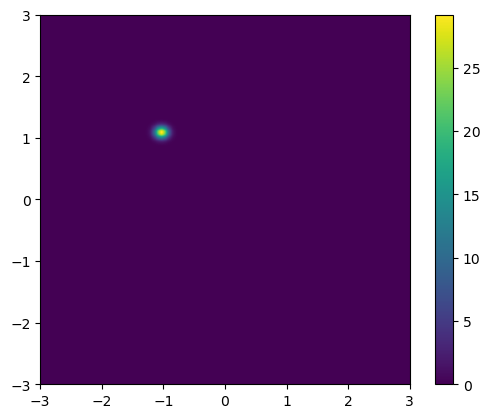

In [30]:
plt.imshow(p.T, origin="lower", extent=[-3,3,-3,3])
plt.colorbar()
plt.show()

#### C) 
Compute posterior predictive $p(y|x,D)$ variance for inputs $x\in[-3,3]^2$.


In [31]:
# make grid
X,Y = np.mgrid[-3:3:step, -3:3:step]
K = X.shape[0]
xy = np.vstack((X.flatten(), Y.flatten())).T

# compute variance
y_var = np.sum((xy@Sigma)*xy,axis=1) + sigmasqr_y
y_var = y_var.reshape(K,K)

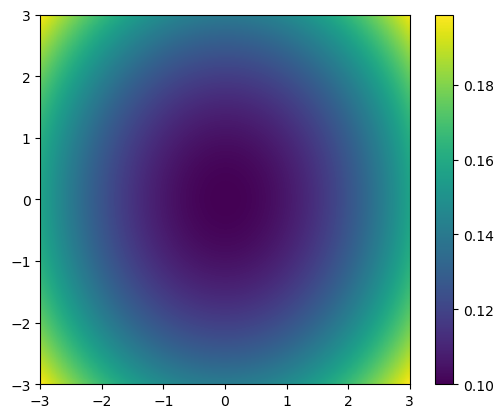

In [32]:
# plot
plt.imshow(y_var.T, origin="lower", extent=[-3,3,-3,3])
plt.colorbar()
plt.show()

#### D)
Repeat with covariance $\Sigma_X$ with $\Sigma_X[1,1]=0.1$.

Consider also $p(y|x)$ with $\sigma^2=0.01$.

In [37]:
# repeat previous steps (yes, you could make this cleaner by making the above a function)
N = 20
sigmasqr_y = 0.1  # rerun with 0.01
X = np.random.normal(size = (N,2))

SigmaX = np.eye(2)
SigmaX[0,0] = 0.1
mvnXD = multivariate_normal(np.zeros(2),SigmaX)

X = mvnXD.rvs(size=N)
y = X@theta  + sigmasqr_y**0.5*np.random.randn(X.shape[0])

C = np.linalg.inv(sigmasqr_y * np.eye(N) + X @X.T)
mu = X.T@C@y
Sigma = np.eye(d) - X.T@C@X

mu, Sigma

(array([-1.06393668,  0.96355144]),
 array([[3.29011729e-03, 9.95559928e-06],
        [9.95559932e-06, 4.51577564e-04]]))

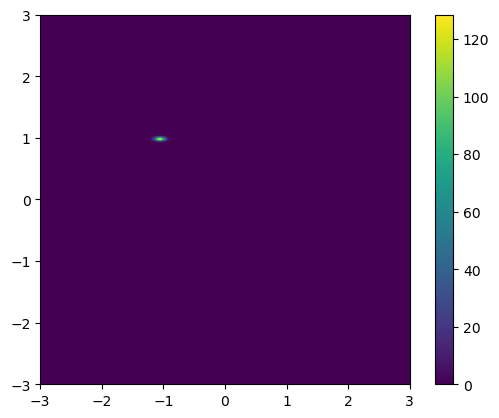

In [38]:
# evaluate on grid
X,Y = np.mgrid[-3:3:step, -3:3:step]
K = X.shape[0]
xy = np.vstack((X.flatten(), Y.flatten())).T

mvn = multivariate_normal(mu,Sigma)
# pdf on the grid
p = mvn.pdf(xy)
p = p.reshape(K,K)

plt.imshow(p.T, origin="lower", extent=[-3,3,-3,3])
plt.colorbar()
plt.show()

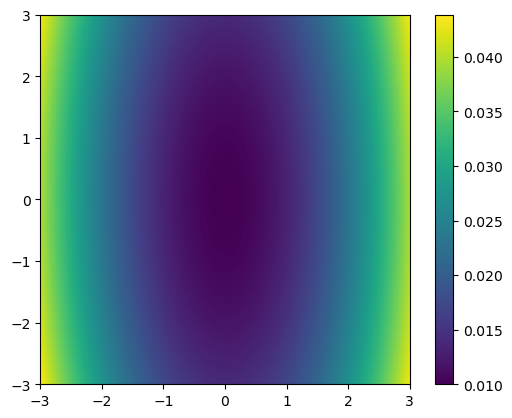

In [39]:
X,Y = np.mgrid[-3:3:step, -3:3:step]
K = X.shape[0]
xy = np.vstack((X.flatten(), Y.flatten())).T

# variance
y_var = np.sum((xy@Sigma)*xy,axis=1) + sigmasqr_y
y_var = y_var.reshape(K,K)

plt.imshow(y_var.T, origin="lower", extent=[-3,3,-3,3])
plt.colorbar()
plt.show()

If we decrease the variance of the posterior predictive $p(y|x)$ we observe a more peaked pdf estimate and a lower variance estimate (higher confidence).

## Exercises, week 2
### Bishop 9.10)
Given a density model by a mixture distribution
$p(x) = \sum_{k\in K}\pi_k p(\mathbf{x}|k)$ we partition $\mathbf{x}=(x_a,x_b)$ and have to show that $p(x_b|x_a)$ is again a mixture distribution. Find the mixing coefficients and component densities.


*Use that* $p(x_b|x_a)=\frac{p(x_b, x_a)}{p(x_a)}$ from the factorized conditional.


\begin{align*}
p(x_b|x_a)&=\frac{p(x_b, x_a)}{p(x_a)}\\
&=\frac{\sum_{k\in K}\pi_k p((x_a,x_b)|k)}{\sum_{j\in K}\pi_jp(x_a|j)}\\
&=\sum_{k\in K}\frac{\pi_k p((x_a,x_b)|k)}{\sum_{j\in K}\pi_jp(x_a|j)}\\
&=\sum_{k\in K}\frac{\pi_k p(x_a|k)}{p(x_a)} p(x_b|x_a, k)\\
\end{align*}

We have the mixing coefficient as $\sum_{k\in K}\frac{\pi_k p(x_a|k)}{p(x_a)}$ and density as the right-most term.
We can set it up such that the mixing coefficient sum to one: take out $\frac{1}{p(x_a)}$ and resolve the sum, result is one.

#### Bishop, 10.4)

Let $\mathbf x \in \mathbb{R}^d$ be a random vector.  We will approximate $p(\mathbf x)$ using a multivariate Gaussian density function
$$
\begin{equation}
q(\mathbf x)=(2 \pi )^{-d/2} |\pmb{\Sigma}|^{-1/2} \exp \left( -\frac{1}{2} (\mathbf x- \pmb{\mu})^T \pmb{\Sigma}^{-1} (\mathbf x- \pmb{\mu}) \right).
%\label{eq:1}
\end{equation}
$$
More precisely, we want to find the   multivariate Gaussian density  function $q(\mathbf x)$ that minimizes

\begin{align*}
{\rm KL}(p \| q )&= -\int p(\mathbf x) \ln \frac{q(\mathbf x) }{p(\mathbf x) } d \mathbf x  \\
&=-\int p(\mathbf x) \ln q(\mathbf x) d \mathbf x+ \text{cst}  \\
&=-\int p(\mathbf x) \ln \left((2 \pi )^{-d/2} |\pmb{\Sigma}|^{-1/2} \exp \left( -\frac{1}{2} (\mathbf x- \pmb{\mu})^T \pmb{\Sigma}^{-1} (\mathbf x- \pmb{\mu}) \right) \right)d \mathbf x+ \text{cst}  \\
&=-\int p(\mathbf x)  \left( - \frac{d}{2} \ln 2 \pi -   \frac{1}{2}\ln  |\pmb{\Sigma}|- \frac{1}{2}(\mathbf x- \pmb{\mu})^T \pmb{\Sigma}^{-1} (\mathbf x- \pmb{\mu}) \right) d \mathbf x+ \text{cst}  \\
&=\frac{d}{2} \ln 2 \pi + \frac{1}{2}\ln  |\pmb{\Sigma}| +\int p(\mathbf x) \frac{1}{2}(\mathbf x- \pmb{\mu})^T \pmb{\Sigma}^{-1} (\mathbf x- \pmb{\mu}) d \mathbf x+ \text{cst}  \\
&= \frac{d}{2} \ln 2 \pi + \frac{1}{2}\ln  |\pmb{\Sigma}| +  \frac{1}{2}  \mathbb{E} \left[(\mathbf x- \pmb{\mu})^T \pmb{\Sigma}^{-1} (\mathbf x- \pmb{\mu}) \right] + \text{cst}   \\
&= \frac{d}{2} \ln 2 \pi + \frac{1}{2}\ln  |\pmb{\Sigma}| +  \frac{1}{2}  \mathbb{E} \left[\text{Tr}\left(\pmb{\Sigma}^{-1} (\mathbf x- \pmb{\mu}) (\mathbf x- \pmb{\mu})^T  \right) \right] + \text{cst}   \\
&= \frac{d}{2} \ln 2 \pi + \frac{1}{2}\ln  |\pmb{\Sigma}| +  \frac{1}{2}  \text{Tr}\left(\pmb{\Sigma}^{-1} \mathbb{E} \left[(\mathbf x- \pmb{\mu}) (\mathbf x- \pmb{\mu})^T   \right]\right) + \text{cst}   \\
&= \frac{d}{2} \ln 2 \pi + \frac{1}{2}\ln  |\pmb{\Sigma}| +  \frac{1}{2}  \text{Tr}\left(\pmb{\Sigma}^{-1} \mathbb{E} \left[\mathbf x \mathbf x^T   \right]\right) +     \frac{1}{2}  \text{Tr}\left(\pmb{\Sigma}^{-1}  \pmb{\mu} \pmb{\mu}^T   \right)-  \text{Tr}\left(\pmb{\Sigma}^{-1} \mathbb{E} \left[ \mathbf x \right] \pmb{\mu}^T  \right)+ \text{cst}   \\
&= \frac{d}{2} \ln 2 \pi + \frac{1}{2}\ln  |\pmb{\Sigma}| +  \frac{1}{2}  \text{Tr}\left(\pmb{\Sigma}^{-1} \mathbb{E} \left[\mathbf x \mathbf x^T   \right]\right) +    \frac{1}{2} \pmb{\mu}^T  \pmb{\Sigma}^{-1}  \pmb{\mu}   -    \pmb{\mu}^T \pmb{\Sigma}^{-1} \mathbb{E} \left[ \mathbf x \right]  + \text{cst} ,
\end{align*}

where $\mathbb{E}[\,]$ denotes the expectation operator, $ \text{Tr}(\,)$ denotes the trace operator and  cst denotes a constant independent  of $\pmb{\mu}$ and  $\pmb{\Sigma}$. Note that the different constants  cst in the above derivation can be different. In the derivation we made use of the linearity of the expectation and trace operators and the  cyclic property of the trace operator (i.e., $ \text{Tr}(\mathbf{A}\mathbf{B} )=\text{Tr}(\mathbf{B}\mathbf{A} )$ for any conformable matrices $\mathbf{A} $ and $\mathbf{B} $).
Using the above expression, we  find that

 \begin{align*}
 \frac{\partial {\rm KL}(p \| q )}{\partial \pmb{\mu}}&=\frac{\partial  }{\partial \pmb{\mu}}\left(
 \frac{d}{2} \ln 2 \pi + \frac{1}{2}\ln  |\pmb{\Sigma}| +  \frac{1}{2}  \text{Tr}\left(\pmb{\Sigma}^{-1} \mathbb{E} \left[\mathbf x \mathbf x^T   \right]\right) +    \frac{1}{2} \pmb{\mu}^T  \pmb{\Sigma}^{-1}  \pmb{\mu}   -    \pmb{\mu}^T \pmb{\Sigma}^{-1} \mathbb{E} \left[ \mathbf x \right]  + \text{cst} \right)  \\
 &=\frac{\partial  }{\partial \pmb{\mu}}\left( \frac{1}{2} \pmb{\mu}^T  \pmb{\Sigma}^{-1}  \pmb{\mu}\right) - \frac{\partial  }{\partial \pmb{\mu}}\left(   \pmb{\mu}^T \pmb{\Sigma}^{-1} \mathbb{E} \left[ \mathbf x \right] \right) \\
  &=     \pmb{\Sigma}^{-1}  \pmb{\mu}  -    \pmb{\Sigma}^{-1} \mathbb{E} \left[ \mathbf x \right] .
\end{align*}
Hence,
\begin{align*}
 \frac{\partial {\rm KL}(p \| q )}{\partial \pmb{\mu}}&=  \pmb{\Sigma}^{-1}  \pmb{\mu}  -    \pmb{\Sigma}^{-1} \mathbb{E} \left[ \mathbf x \right] \mathbf =0 \Rightarrow \pmb{\mu}=  \mathbb{E} \left[ \mathbf x \right] .
\end{align*}

Using the above expression, we also  find that
$$
 \begin{align*}
\frac{\partial {\rm KL}(p \| q )}{\partial \pmb{\Sigma}}&=\frac{\partial  }{\partial \pmb{\Sigma} }\left(
 \frac{d}{2} \ln 2 \pi + \frac{1}{2}\ln  |\pmb{\Sigma}| +  \frac{1}{2}  \text{Tr}\left(\pmb{\Sigma}^{-1} \mathbb{E} \left[\mathbf x \mathbf x^T   \right]\right) +    \frac{1}{2} \pmb{\mu}^T  \pmb{\Sigma}^{-1}  \pmb{\mu}   -    \pmb{\mu}^T \pmb{\Sigma}^{-1} \mathbb{E} \left[ \mathbf x \right]  + \text{cst} \right) \\
 &= \frac{1}{2} \frac{\partial  }{\partial \pmb{\Sigma} }\left( \ln  |\pmb{\Sigma}| \right)+
 \frac{1}{2} \frac{\partial  }{\partial \pmb{\Sigma} }\left(   \text{Tr}\left(\pmb{\Sigma}^{-1} \mathbb{E} \left[\mathbf x \mathbf x^T   \right] \right) \right)+
 \frac{1}{2} \frac{\partial  }{\partial \pmb{\Sigma} }\left( \pmb{\mu}^T  \pmb{\Sigma}^{-1}  \pmb{\mu}  \right)-
\frac{\partial  }{\partial \pmb{\Sigma} }\left(\pmb{\mu}^T \pmb{\Sigma}^{-1} \mathbb{E} \left[ \mathbf x \right] \right).
 \end{align*}
$$
Using the identities (see for example [here](https://en.wikipedia.org/wiki/Matrix_calculus) or  The Matrix Cookbook and references therein for details)
$$
 \begin{align*}
\frac{\partial  }{\partial \pmb{\Sigma} }\left( \ln  |\pmb{\Sigma}| \right)&= \pmb{\Sigma}^{-1}, \\
 \frac{\partial  }{\partial \pmb{\Sigma} }\left(   \text{Tr}\left(\pmb{\Sigma}^{-1} \mathbb{E} \left[\mathbf x \mathbf x^T   \right] \right) \right)
 &=-\pmb{\Sigma}^{-1} \mathbb{E} \left[\mathbf x \mathbf x^T   \right] \pmb{\Sigma}^{-1} ,  \\
\frac{\partial  }{\partial \pmb{\Sigma} }\left( \pmb{\mu}^T  \pmb{\Sigma}^{-1}  \pmb{\mu}  \right)&=-\pmb{\Sigma}^{-1} \pmb{\mu}\pmb{\mu}^T \pmb{\Sigma}^{-1}
  \end{align*}
$$
and the fact that $\pmb{\mu}=  \mathbb{E} \left[ \mathbf x \right]$, we obtain
$$
 \begin{align*}
\frac{\partial {\rm KL}(p \| q )}{\partial \pmb{\Sigma}}
&= \frac{1}{2} \frac{\partial  }{\partial \pmb{\Sigma} }\left( \ln  |\pmb{\Sigma}| \right)+
 \frac{1}{2} \frac{\partial  }{\partial \pmb{\Sigma} }\left(   \text{Tr}\left(\pmb{\Sigma}^{-1} \mathbb{E} \left[\mathbf x \mathbf x^T   \right] \right) \right)+
 \frac{1}{2} \frac{\partial  }{\partial \pmb{\Sigma} }\left( \pmb{\mu}^T  \pmb{\Sigma}^{-1}  \pmb{\mu}  \right)-
\frac{\partial  }{\partial \pmb{\Sigma} }\left(\pmb{\mu}^T \pmb{\Sigma}^{-1} \mathbb{E} \left[ \mathbf x \right] \right)  \\
&= \frac{1}{2} \frac{\partial  }{\partial \pmb{\Sigma} }\left( \ln  |\pmb{\Sigma}| \right)+
 \frac{1}{2} \frac{\partial  }{\partial \pmb{\Sigma} }\left(   \text{Tr}\left(\pmb{\Sigma}^{-1} \mathbb{E} \left[\mathbf x \mathbf x^T   \right] \right) \right)+
 \frac{1}{2} \frac{\partial  }{\partial \pmb{\Sigma} }\left( \pmb{\mu}^T  \pmb{\Sigma}^{-1}  \pmb{\mu}  \right)-
\frac{\partial  }{\partial \pmb{\Sigma} }\left(\pmb{\mu}^T \pmb{\Sigma}^{-1}\pmb{\mu} \right)  \\
&= \frac{1}{2} \frac{\partial  }{\partial \pmb{\Sigma} }\left( \ln  |\pmb{\Sigma}| \right)+
 \frac{1}{2} \frac{\partial  }{\partial \pmb{\Sigma} }\left(   \text{Tr}\left(\pmb{\Sigma}^{-1} \mathbb{E} \left[\mathbf x \mathbf x^T   \right] \right) \right)-
 \frac{1}{2} \frac{\partial  }{\partial \pmb{\Sigma} }\left( \pmb{\mu}^T  \pmb{\Sigma}^{-1}  \pmb{\mu}  \right)  \\
 &= \frac{1}{2} \pmb{\Sigma}^{-1} -  \frac{1}{2} \pmb{\Sigma}^{-1} \mathbb{E} \left[\mathbf x \mathbf x^T   \right] \pmb{\Sigma}^{-1}
 +\frac{1}{2}  \pmb{\Sigma}^{-1} \pmb{\mu}\pmb{\mu}^T \pmb{\Sigma}^{-1} .
 \end{align*}
$$
Hence,
$$
 \begin{align*}
\frac{\partial {\rm KL}(p \| q )}{\partial \pmb{\Sigma}}
 &= \frac{1}{2} \pmb{\Sigma}^{-1} -  \frac{1}{2} \pmb{\Sigma}^{-1} \mathbb{E} \left[\mathbf x \mathbf x^T   \right] \pmb{\Sigma}^{-1}
 +\frac{1}{2}  \pmb{\Sigma}^{-1} \pmb{\mu}\pmb{\mu}^T \pmb{\Sigma}^{-1} =\mathbf 0 \Rightarrow  \pmb{\Sigma}= \mathbb{E} \left[\mathbf x \mathbf x^T   \right]- \pmb{\mu}\pmb{\mu}^T .
 \end{align*}
$$

### Programming exercise pt.2

Train a VAE on binarized MNIST

In [63]:
# load more tools
# as suggested in the exercise we use:
# https://github.com/pytorch/examples/blob/main/vae/main.py (commit 387ce7b) (last accessed 04/12/24)
# we modify the architecture slightly

from typing import List
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torch.nn import functional as F
from torchvision import datasets
from torchvision import transforms
from tqdm import tqdm

batch_size=128
test_batch_size=128
device = torch.device("mps")  # for some of you this is "cuda" or "cpu"

train_loader = DataLoader(
datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,)),
                       lambda x: x>0,
                       lambda x: x.float(),
            ])), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(
datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,)),
                       lambda x: x>0,
                       lambda x: x.float(),
                   ])), batch_size=test_batch_size, shuffle=True)

In [52]:
class Encoder(nn.Module):
    def __init__(self, dimensions: List[int], input_dim: int=784):
        super().__init__()
        assert len(dimensions) == 2, "encoder only defined for two layers" 
        self.input_dim = input_dim
        self.in_layer = nn.Linear(input_dim, dimensions[0])
        self.mu = nn.Linear(dimensions[0], dimensions[-1])
        self.logvar = nn.Linear(dimensions[0], dimensions[-1])
    
    def __call__(self, x: torch.Tensor) -> torch.Tensor:
        x = F.relu(self.in_layer(x))
        return self.mu(x), self.logvar(x)


class Decoder(nn.Module):
    def __init__(self, dimensions: List[int], output_dim: int=784):
        super().__init__()
        assert len(dimensions) == 2, "decoder only defined for two layers"
        self.output_dim = output_dim
        self.hidden_layer = nn.Linear(dimensions[0], dimensions[-1])
        self.out_layer = nn.Linear(dimensions[-1], output_dim)
    
    def __call__(self, x: torch.Tensor) -> torch.Tensor:
        x = F.relu(self.hidden_layer(x))
        return torch.sigmoid(self.out_layer(x))
    

In [66]:
class VAE(nn.Module):
    def __init__(self, encoder: Encoder, decoder: Decoder):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder

    def reparameterize(self, mu: torch.Tensor, logvar: torch.Tensor):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std
    
    def forward(self, x):
        mu, logvar = self.encoder(x.view(-1, self.encoder.input_dim))
        z = self.reparameterize(mu, logvar)
        return self.decoder(z), mu, logvar
        

In [73]:
def loss(reconstruction_x: torch.Tensor, x: torch.Tensor, mu: torch.Tensor, logvar: torch.Tensor) -> torch.Tensor:
    BCE = F.binary_cross_entropy(reconstruction_x, x.view(-1, reconstruction_x.shape[-1]), reduction="sum")
    KLD = -0.5 * torch.sum( 1 + logvar - mu.pow(2) - logvar.exp() ) 
    # NOTE: this loss could be better/nicer using other torch tools - you should investigate.
    return BCE + KLD

In [81]:
# instantiate the objects
d = 2
encoder = Encoder([200, d]).to(device)
decoder = Decoder([d, 200]).to(device)
vae = VAE(encoder, decoder).to(device)

# instantiate optimizer
optimizer = optim.Adam(vae.parameters(), lr=1e-3)  # bonus points for not using Adam

In [82]:
logging_idx = 10

def train(epoch: int, model: VAE, optimizer: optim.Optimizer, train_loader: DataLoader, logging_idx=logging_idx) -> None:
    model.train()
    train_loss = 0.
    for batch, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batched, mu, logvar = model(data)

        l = loss(recon_batched, data, mu, logvar)
        l.backward()

        train_loss += l.item()
        optimizer.step()
        if batch % logging_idx == 0:
            print(f"Train epoch: {epoch} [{batch*len(data)}/{len(train_loader.dataset)}]\tLoss: {l.item()/len(data):.6f}")
        
        print(f"====> Epoch {epoch} avrg. loss {train_loss / len(train_loader.dataset)}")

In [83]:
def test(epoch: int, model: VAE, optimizer: optim.Optimizer, test_loader: DataLoader) -> None:
    model.eval()
    test_loss = 0.
    with torch.no_grad():
        for batch, (data, _) in enumerate(test_loader):
            data = data.to(device)
            recon_batch, mu, logvar = model(data)
            test_loss += loss(recon_batch, data, mu, logvar).item()
    test_loss /= len(test_loader.dataset)
    print(f"====> Test loss: {test_loss:.4f}")

In [84]:
EPOCHS = 50

for e in tqdm(range(1, EPOCHS+1)):
    train(e, vae, optimizer, train_loader, 5)
    test(e, vae, optimizer, test_loader)

  0%|          | 0/50 [00:00<?, ?it/s]

Train epoch: 1 [0/60000]	Loss: 549.368225
====> Epoch 1 avrg. loss 1.171985546875
====> Epoch 1 avrg. loss 2.3129938802083334
====> Epoch 1 avrg. loss 3.4208557291666666
====> Epoch 1 avrg. loss 4.49321015625
====> Epoch 1 avrg. loss 5.529532096354167
Train epoch: 1 [640/60000]	Loss: 466.098724
====> Epoch 1 avrg. loss 6.523876041666667
====> Epoch 1 avrg. loss 7.4686278645833335
====> Epoch 1 avrg. loss 8.352628645833333
====> Epoch 1 avrg. loss 9.185276236979167
====> Epoch 1 avrg. loss 9.950755794270833
Train epoch: 1 [1280/60000]	Loss: 341.610107
====> Epoch 1 avrg. loss 10.6795240234375
====> Epoch 1 avrg. loss 11.372824479166667
====> Epoch 1 avrg. loss 12.050253645833333
====> Epoch 1 avrg. loss 12.692817578125
====> Epoch 1 avrg. loss 13.311726692708334
Train epoch: 1 [1920/60000]	Loss: 292.625397
====> Epoch 1 avrg. loss 13.935994205729166
====> Epoch 1 avrg. loss 14.5578705078125
====> Epoch 1 avrg. loss 15.176630533854167
====> Epoch 1 avrg. loss 15.773152799479167
====> Epo

  2%|▏         | 1/50 [00:08<06:51,  8.39s/it]

====> Test loss: 184.2647
Train epoch: 2 [0/60000]	Loss: 185.353729
====> Epoch 2 avrg. loss 0.3954212890625
====> Epoch 2 avrg. loss 0.7860498046875
====> Epoch 2 avrg. loss 1.179539453125
====> Epoch 2 avrg. loss 1.5676535807291667
====> Epoch 2 avrg. loss 1.9605472330729166
Train epoch: 2 [640/60000]	Loss: 183.645172
====> Epoch 2 avrg. loss 2.3523236002604166
====> Epoch 2 avrg. loss 2.7547833984375
====> Epoch 2 avrg. loss 3.1596998372395833
====> Epoch 2 avrg. loss 3.5647616861979166
====> Epoch 2 avrg. loss 3.945333561197917
Train epoch: 2 [1280/60000]	Loss: 181.264694
====> Epoch 2 avrg. loss 4.332031575520833
====> Epoch 2 avrg. loss 4.723558854166667
====> Epoch 2 avrg. loss 5.131656380208334
====> Epoch 2 avrg. loss 5.529751692708333
====> Epoch 2 avrg. loss 5.914710904947917
Train epoch: 2 [1920/60000]	Loss: 179.926788
====> Epoch 2 avrg. loss 6.298554720052083
====> Epoch 2 avrg. loss 6.720451985677084
====> Epoch 2 avrg. loss 7.109532942708333
====> Epoch 2 avrg. loss 7.4

  4%|▍         | 2/50 [00:15<06:09,  7.71s/it]

====> Test loss: 175.2986
Train epoch: 3 [0/60000]	Loss: 183.415100
====> Epoch 3 avrg. loss 0.391285546875
====> Epoch 3 avrg. loss 0.7600759440104167
====> Epoch 3 avrg. loss 1.14242041015625
====> Epoch 3 avrg. loss 1.52628095703125
====> Epoch 3 avrg. loss 1.89625625
Train epoch: 3 [640/60000]	Loss: 180.934082
====> Epoch 3 avrg. loss 2.282248958333333
====> Epoch 3 avrg. loss 2.64865595703125
====> Epoch 3 avrg. loss 3.02775068359375
====> Epoch 3 avrg. loss 3.3852041015625
====> Epoch 3 avrg. loss 3.75421533203125
Train epoch: 3 [1280/60000]	Loss: 172.700699
====> Epoch 3 avrg. loss 4.122643489583333
====> Epoch 3 avrg. loss 4.499190690104166
====> Epoch 3 avrg. loss 4.873125944010416
====> Epoch 3 avrg. loss 5.253976627604167
====> Epoch 3 avrg. loss 5.61447802734375
Train epoch: 3 [1920/60000]	Loss: 171.383835
====> Epoch 3 avrg. loss 5.980096875
====> Epoch 3 avrg. loss 6.3561305338541665
====> Epoch 3 avrg. loss 6.734399381510417
====> Epoch 3 avrg. loss 7.11003291015625
====

  6%|▌         | 3/50 [00:23<05:58,  7.63s/it]

====> Test loss: 171.3001
Train epoch: 4 [0/60000]	Loss: 176.799622
====> Epoch 4 avrg. loss 0.3771725260416667
====> Epoch 4 avrg. loss 0.7434877278645833
====> Epoch 4 avrg. loss 1.1214029622395834
====> Epoch 4 avrg. loss 1.4834049153645834
====> Epoch 4 avrg. loss 1.8349729817708333
Train epoch: 4 [640/60000]	Loss: 165.482422
====> Epoch 4 avrg. loss 2.1880021484375
====> Epoch 4 avrg. loss 2.5533464518229168
====> Epoch 4 avrg. loss 2.9288789388020833
====> Epoch 4 avrg. loss 3.2926776692708333
====> Epoch 4 avrg. loss 3.6613025065104168
Train epoch: 4 [1280/60000]	Loss: 157.520538
====> Epoch 4 avrg. loss 3.9973463216145833
====> Epoch 4 avrg. loss 4.359155631510417
====> Epoch 4 avrg. loss 4.730770833333334
====> Epoch 4 avrg. loss 5.1231662109375
====> Epoch 4 avrg. loss 5.487196061197917
Train epoch: 4 [1920/60000]	Loss: 172.866104
====> Epoch 4 avrg. loss 5.855977083333333
====> Epoch 4 avrg. loss 6.222706901041667
====> Epoch 4 avrg. loss 6.584775358072917
====> Epoch 4 avrg

  8%|▊         | 4/50 [00:30<05:45,  7.51s/it]

====> Test loss: 168.5857
Train epoch: 5 [0/60000]	Loss: 159.674561
====> Epoch 5 avrg. loss 0.3406390625
====> Epoch 5 avrg. loss 0.7002009114583333
====> Epoch 5 avrg. loss 1.06339443359375
====> Epoch 5 avrg. loss 1.4136758463541668
====> Epoch 5 avrg. loss 1.75776689453125
Train epoch: 5 [640/60000]	Loss: 171.123749
====> Epoch 5 avrg. loss 2.1228308919270833
====> Epoch 5 avrg. loss 2.48812978515625
====> Epoch 5 avrg. loss 2.8486701171875
====> Epoch 5 avrg. loss 3.1964552734375
====> Epoch 5 avrg. loss 3.5623111002604166
Train epoch: 5 [1280/60000]	Loss: 169.718674
====> Epoch 5 avrg. loss 3.9243776041666667
====> Epoch 5 avrg. loss 4.290246223958333
====> Epoch 5 avrg. loss 4.65655947265625
====> Epoch 5 avrg. loss 5.019156217447916
====> Epoch 5 avrg. loss 5.378475520833334
Train epoch: 5 [1920/60000]	Loss: 172.604706
====> Epoch 5 avrg. loss 5.7466988932291665
====> Epoch 5 avrg. loss 6.1146674153645835
====> Epoch 5 avrg. loss 6.475179459635417
====> Epoch 5 avrg. loss 6.837

 10%|█         | 5/50 [00:38<05:38,  7.52s/it]

====> Test loss: 166.6234
Train epoch: 6 [0/60000]	Loss: 169.092529
====> Epoch 6 avrg. loss 0.36073072916666665
====> Epoch 6 avrg. loss 0.7354373372395834
====> Epoch 6 avrg. loss 1.0956330729166666
====> Epoch 6 avrg. loss 1.4529195638020833
====> Epoch 6 avrg. loss 1.8089464192708333
Train epoch: 6 [640/60000]	Loss: 167.729218
====> Epoch 6 avrg. loss 2.16676875
====> Epoch 6 avrg. loss 2.5215708984375
====> Epoch 6 avrg. loss 2.8615205403645834
====> Epoch 6 avrg. loss 3.209144921875
====> Epoch 6 avrg. loss 3.5729972981770834
Train epoch: 6 [1280/60000]	Loss: 167.556366
====> Epoch 6 avrg. loss 3.93045087890625
====> Epoch 6 avrg. loss 4.295596875
====> Epoch 6 avrg. loss 4.649001334635416
====> Epoch 6 avrg. loss 5.0085197265625
====> Epoch 6 avrg. loss 5.359428645833333
Train epoch: 6 [1920/60000]	Loss: 170.513550
====> Epoch 6 avrg. loss 5.723190885416667
====> Epoch 6 avrg. loss 6.0733931640625
====> Epoch 6 avrg. loss 6.444513736979166
====> Epoch 6 avrg. loss 6.813663704427

 12%|█▏        | 6/50 [00:45<05:30,  7.52s/it]

====> Test loss: 165.1747
Train epoch: 7 [0/60000]	Loss: 171.176865
====> Epoch 7 avrg. loss 0.3651773111979167
====> Epoch 7 avrg. loss 0.7285609375
====> Epoch 7 avrg. loss 1.0722600911458333
====> Epoch 7 avrg. loss 1.4180921223958334
====> Epoch 7 avrg. loss 1.7883055989583334
Train epoch: 7 [640/60000]	Loss: 171.079483
====> Epoch 7 avrg. loss 2.1532751627604165
====> Epoch 7 avrg. loss 2.5344080078125
====> Epoch 7 avrg. loss 2.8862757161458332
====> Epoch 7 avrg. loss 3.2388619140625
====> Epoch 7 avrg. loss 3.5790245768229165
Train epoch: 7 [1280/60000]	Loss: 174.724075
====> Epoch 7 avrg. loss 3.951769270833333
====> Epoch 7 avrg. loss 4.307712337239583
====> Epoch 7 avrg. loss 4.657491764322916
====> Epoch 7 avrg. loss 5.015994205729167
====> Epoch 7 avrg. loss 5.362701334635417
Train epoch: 7 [1920/60000]	Loss: 163.405457
====> Epoch 7 avrg. loss 5.711299641927083
====> Epoch 7 avrg. loss 6.054050911458333
====> Epoch 7 avrg. loss 6.409508430989583
====> Epoch 7 avrg. loss 6

 14%|█▍        | 7/50 [00:53<05:25,  7.56s/it]

====> Test loss: 163.6057
Train epoch: 8 [0/60000]	Loss: 153.760391
====> Epoch 8 avrg. loss 0.32802216796875
====> Epoch 8 avrg. loss 0.6852607421875
====> Epoch 8 avrg. loss 1.0414858072916666
====> Epoch 8 avrg. loss 1.3798252604166668
====> Epoch 8 avrg. loss 1.7393656901041668
Train epoch: 8 [640/60000]	Loss: 154.606277
====> Epoch 8 avrg. loss 2.0691924153645833
====> Epoch 8 avrg. loss 2.4110958658854167
====> Epoch 8 avrg. loss 2.747614583333333
====> Epoch 8 avrg. loss 3.08670576171875
====> Epoch 8 avrg. loss 3.442737825520833
Train epoch: 8 [1280/60000]	Loss: 160.194077
====> Epoch 8 avrg. loss 3.7844851888020834
====> Epoch 8 avrg. loss 4.1275572591145835
====> Epoch 8 avrg. loss 4.476616634114583
====> Epoch 8 avrg. loss 4.846403125
====> Epoch 8 avrg. loss 5.185331901041667
Train epoch: 8 [1920/60000]	Loss: 155.485550
====> Epoch 8 avrg. loss 5.517034407552083
====> Epoch 8 avrg. loss 5.85843349609375
====> Epoch 8 avrg. loss 6.206271712239583
====> Epoch 8 avrg. loss 6.5

 16%|█▌        | 8/50 [01:00<05:14,  7.48s/it]

====> Test loss: 162.7909
Train epoch: 9 [0/60000]	Loss: 172.541412
====> Epoch 9 avrg. loss 0.36808834635416665
====> Epoch 9 avrg. loss 0.7187521484375
====> Epoch 9 avrg. loss 1.0640076822916666
====> Epoch 9 avrg. loss 1.4305141927083334
====> Epoch 9 avrg. loss 1.7683965494791667
Train epoch: 9 [640/60000]	Loss: 162.522446
====> Epoch 9 avrg. loss 2.1151111002604166
====> Epoch 9 avrg. loss 2.44105029296875
====> Epoch 9 avrg. loss 2.7664558268229165
====> Epoch 9 avrg. loss 3.1130484700520835
====> Epoch 9 avrg. loss 3.4503388346354167
Train epoch: 9 [1280/60000]	Loss: 156.203476
====> Epoch 9 avrg. loss 3.7835729166666665
====> Epoch 9 avrg. loss 4.157144075520834
====> Epoch 9 avrg. loss 4.5055572265625
====> Epoch 9 avrg. loss 4.855592805989583
====> Epoch 9 avrg. loss 5.188032975260417
Train epoch: 9 [1920/60000]	Loss: 163.390991
====> Epoch 9 avrg. loss 5.536600423177084
====> Epoch 9 avrg. loss 5.881452506510417
====> Epoch 9 avrg. loss 6.2254408203125
====> Epoch 9 avrg. l

 18%|█▊        | 9/50 [01:07<05:05,  7.46s/it]

====> Test loss: 161.8760
Train epoch: 10 [0/60000]	Loss: 161.197006
====> Epoch 10 avrg. loss 0.34388694661458336
====> Epoch 10 avrg. loss 0.70007060546875
====> Epoch 10 avrg. loss 1.0321802734375
====> Epoch 10 avrg. loss 1.3719892903645834
====> Epoch 10 avrg. loss 1.72192451171875
Train epoch: 10 [640/60000]	Loss: 167.669937
====> Epoch 10 avrg. loss 2.079620377604167
====> Epoch 10 avrg. loss 2.429394401041667
====> Epoch 10 avrg. loss 2.76436826171875
====> Epoch 10 avrg. loss 3.1042968098958332
====> Epoch 10 avrg. loss 3.4511595703125
Train epoch: 10 [1280/60000]	Loss: 162.051178
====> Epoch 10 avrg. loss 3.79686875
====> Epoch 10 avrg. loss 4.1315896484375
====> Epoch 10 avrg. loss 4.47309951171875
====> Epoch 10 avrg. loss 4.81985546875
====> Epoch 10 avrg. loss 5.159826725260417
Train epoch: 10 [1920/60000]	Loss: 166.048080
====> Epoch 10 avrg. loss 5.5140626302083335
====> Epoch 10 avrg. loss 5.853354720052083
====> Epoch 10 avrg. loss 6.18954150390625
====> Epoch 10 avrg

 20%|██        | 10/50 [01:15<05:00,  7.51s/it]

====> Test loss: 161.0470
Train epoch: 11 [0/60000]	Loss: 156.438217
====> Epoch 11 avrg. loss 0.33373486328125
====> Epoch 11 avrg. loss 0.6864259114583333
====> Epoch 11 avrg. loss 1.0494376627604167
====> Epoch 11 avrg. loss 1.39960458984375
====> Epoch 11 avrg. loss 1.7623236328125
Train epoch: 11 [640/60000]	Loss: 168.529190
====> Epoch 11 avrg. loss 2.1218525716145833
====> Epoch 11 avrg. loss 2.4365604166666666
====> Epoch 11 avrg. loss 2.77093388671875
====> Epoch 11 avrg. loss 3.119627604166667
====> Epoch 11 avrg. loss 3.460324967447917
Train epoch: 11 [1280/60000]	Loss: 168.366684
====> Epoch 11 avrg. loss 3.8195072265625
====> Epoch 11 avrg. loss 4.162086979166666
====> Epoch 11 avrg. loss 4.503327962239584
====> Epoch 11 avrg. loss 4.839078548177083
====> Epoch 11 avrg. loss 5.192272721354167
Train epoch: 11 [1920/60000]	Loss: 166.183395
====> Epoch 11 avrg. loss 5.546797298177084
====> Epoch 11 avrg. loss 5.892573209635417
====> Epoch 11 avrg. loss 6.23470419921875
====> 

 22%|██▏       | 11/50 [01:23<04:55,  7.57s/it]

====> Test loss: 160.3993
Train epoch: 12 [0/60000]	Loss: 162.470505
====> Epoch 12 avrg. loss 0.34660374348958334
====> Epoch 12 avrg. loss 0.69985126953125
====> Epoch 12 avrg. loss 1.0580234700520834
====> Epoch 12 avrg. loss 1.4043515299479166
====> Epoch 12 avrg. loss 1.7478107747395832
Train epoch: 12 [640/60000]	Loss: 163.354630
====> Epoch 12 avrg. loss 2.0963006510416666
====> Epoch 12 avrg. loss 2.439209407552083
====> Epoch 12 avrg. loss 2.7768540364583334
====> Epoch 12 avrg. loss 3.1228563802083333
====> Epoch 12 avrg. loss 3.455595182291667
Train epoch: 12 [1280/60000]	Loss: 158.819214
====> Epoch 12 avrg. loss 3.7944095052083333
====> Epoch 12 avrg. loss 4.14786025390625
====> Epoch 12 avrg. loss 4.48350361328125
====> Epoch 12 avrg. loss 4.827313053385416
====> Epoch 12 avrg. loss 5.165250553385417
Train epoch: 12 [1920/60000]	Loss: 157.995148
====> Epoch 12 avrg. loss 5.502306868489583
====> Epoch 12 avrg. loss 5.843745865885417
====> Epoch 12 avrg. loss 6.184691080729

 24%|██▍       | 12/50 [01:30<04:44,  7.49s/it]

====> Test loss: 160.3360
Train epoch: 13 [0/60000]	Loss: 157.952347
====> Epoch 13 avrg. loss 0.33696500651041666
====> Epoch 13 avrg. loss 0.6844345377604166
====> Epoch 13 avrg. loss 1.0205417317708334
====> Epoch 13 avrg. loss 1.3391547526041667
====> Epoch 13 avrg. loss 1.6759346354166667
Train epoch: 13 [640/60000]	Loss: 159.699036
====> Epoch 13 avrg. loss 2.016625911458333
====> Epoch 13 avrg. loss 2.35613955078125
====> Epoch 13 avrg. loss 2.71024482421875
====> Epoch 13 avrg. loss 3.0607478841145834
====> Epoch 13 avrg. loss 3.4096478190104165
Train epoch: 13 [1280/60000]	Loss: 157.058563
====> Epoch 13 avrg. loss 3.7447060872395834
====> Epoch 13 avrg. loss 4.085755989583333
====> Epoch 13 avrg. loss 4.429523046875
====> Epoch 13 avrg. loss 4.748788313802083
====> Epoch 13 avrg. loss 5.09201162109375
Train epoch: 13 [1920/60000]	Loss: 164.752258
====> Epoch 13 avrg. loss 5.44348310546875
====> Epoch 13 avrg. loss 5.779650032552083
====> Epoch 13 avrg. loss 6.11986142578125
=

 26%|██▌       | 13/50 [01:37<04:33,  7.40s/it]

====> Test loss: 159.2479
Train epoch: 14 [0/60000]	Loss: 165.676941
====> Epoch 14 avrg. loss 0.353444140625
====> Epoch 14 avrg. loss 0.6685361002604167
====> Epoch 14 avrg. loss 1.0175599609375
====> Epoch 14 avrg. loss 1.3714519856770833
====> Epoch 14 avrg. loss 1.7127532877604166
Train epoch: 14 [640/60000]	Loss: 158.222580
====> Epoch 14 avrg. loss 2.0502947916666665
====> Epoch 14 avrg. loss 2.4034212890625
====> Epoch 14 avrg. loss 2.7545819010416666
====> Epoch 14 avrg. loss 3.086941959635417
====> Epoch 14 avrg. loss 3.4170231119791667
Train epoch: 14 [1280/60000]	Loss: 163.995224
====> Epoch 14 avrg. loss 3.76687958984375
====> Epoch 14 avrg. loss 4.107669401041667
====> Epoch 14 avrg. loss 4.46539619140625
====> Epoch 14 avrg. loss 4.810398665364583
====> Epoch 14 avrg. loss 5.162876041666666
Train epoch: 14 [1920/60000]	Loss: 157.692200
====> Epoch 14 avrg. loss 5.499286067708334
====> Epoch 14 avrg. loss 5.832904524739583
====> Epoch 14 avrg. loss 6.182916471354167
====>

 28%|██▊       | 14/50 [01:44<04:23,  7.33s/it]

====> Test loss: 159.1341
Train epoch: 15 [0/60000]	Loss: 173.014999
====> Epoch 15 avrg. loss 0.36909866536458336
====> Epoch 15 avrg. loss 0.7091455078125
====> Epoch 15 avrg. loss 1.0280054361979167
====> Epoch 15 avrg. loss 1.36550908203125
====> Epoch 15 avrg. loss 1.7214235026041667
Train epoch: 15 [640/60000]	Loss: 148.065781
====> Epoch 15 avrg. loss 2.03729716796875
====> Epoch 15 avrg. loss 2.3707733723958335
====> Epoch 15 avrg. loss 2.719875423177083
====> Epoch 15 avrg. loss 3.0489855794270833
====> Epoch 15 avrg. loss 3.4026962239583334
Train epoch: 15 [1280/60000]	Loss: 161.079605
====> Epoch 15 avrg. loss 3.74633271484375
====> Epoch 15 avrg. loss 4.077606966145833
====> Epoch 15 avrg. loss 4.429069368489583
====> Epoch 15 avrg. loss 4.75931943359375
====> Epoch 15 avrg. loss 5.085404264322917
Train epoch: 15 [1920/60000]	Loss: 149.666473
====> Epoch 15 avrg. loss 5.404692740885417
====> Epoch 15 avrg. loss 5.751485221354167
====> Epoch 15 avrg. loss 6.094008951822917
=

 30%|███       | 15/50 [01:52<04:15,  7.31s/it]

====> Test loss: 158.6710
Train epoch: 16 [0/60000]	Loss: 165.562424
====> Epoch 16 avrg. loss 0.3531998372395833
====> Epoch 16 avrg. loss 0.6922886393229166
====> Epoch 16 avrg. loss 1.04401005859375
====> Epoch 16 avrg. loss 1.37613359375
====> Epoch 16 avrg. loss 1.7336236002604166
Train epoch: 16 [640/60000]	Loss: 160.043472
====> Epoch 16 avrg. loss 2.0750496744791667
====> Epoch 16 avrg. loss 2.4198214192708334
====> Epoch 16 avrg. loss 2.7584022786458333
====> Epoch 16 avrg. loss 3.09854677734375
====> Epoch 16 avrg. loss 3.4313132161458335
Train epoch: 16 [1280/60000]	Loss: 166.366196
====> Epoch 16 avrg. loss 3.7862277669270834
====> Epoch 16 avrg. loss 4.124983756510416
====> Epoch 16 avrg. loss 4.452069270833333
====> Epoch 16 avrg. loss 4.804482454427084
====> Epoch 16 avrg. loss 5.140196158854167
Train epoch: 16 [1920/60000]	Loss: 153.116608
====> Epoch 16 avrg. loss 5.466844921875
====> Epoch 16 avrg. loss 5.8149953450520835
====> Epoch 16 avrg. loss 6.160237727864583
==

 32%|███▏      | 16/50 [01:59<04:06,  7.24s/it]

====> Test loss: 157.8669
Train epoch: 17 [0/60000]	Loss: 160.605148
====> Epoch 17 avrg. loss 0.34262431640625
====> Epoch 17 avrg. loss 0.65838486328125
====> Epoch 17 avrg. loss 0.9882454427083334
====> Epoch 17 avrg. loss 1.3264579752604166
====> Epoch 17 avrg. loss 1.6540045572916666
Train epoch: 17 [640/60000]	Loss: 168.947571
====> Epoch 17 avrg. loss 2.014426041666667
====> Epoch 17 avrg. loss 2.358143294270833
====> Epoch 17 avrg. loss 2.704157552083333
====> Epoch 17 avrg. loss 3.0466965494791665
====> Epoch 17 avrg. loss 3.380639420572917
Train epoch: 17 [1280/60000]	Loss: 147.930267
====> Epoch 17 avrg. loss 3.6962239908854166
====> Epoch 17 avrg. loss 4.016596842447917
====> Epoch 17 avrg. loss 4.343117936197917
====> Epoch 17 avrg. loss 4.675225227864583
====> Epoch 17 avrg. loss 5.00911396484375
Train epoch: 17 [1920/60000]	Loss: 159.717285
====> Epoch 17 avrg. loss 5.349844173177083
====> Epoch 17 avrg. loss 5.6777482421875
====> Epoch 17 avrg. loss 6.02896611328125
===

 34%|███▍      | 17/50 [02:06<03:57,  7.18s/it]

====> Test loss: 158.2975
Train epoch: 18 [0/60000]	Loss: 157.281570
====> Epoch 18 avrg. loss 0.33553401692708335
====> Epoch 18 avrg. loss 0.6737354166666667
====> Epoch 18 avrg. loss 1.0113880533854167
====> Epoch 18 avrg. loss 1.33553271484375
====> Epoch 18 avrg. loss 1.67508115234375
Train epoch: 18 [640/60000]	Loss: 157.883484
====> Epoch 18 avrg. loss 2.0118992513020832
====> Epoch 18 avrg. loss 2.33545869140625
====> Epoch 18 avrg. loss 2.6769631510416665
====> Epoch 18 avrg. loss 3.0040681966145835
====> Epoch 18 avrg. loss 3.3594281575520832
Train epoch: 18 [1280/60000]	Loss: 166.793030
====> Epoch 18 avrg. loss 3.7152532877604165
====> Epoch 18 avrg. loss 4.053465690104167
====> Epoch 18 avrg. loss 4.385985677083333
====> Epoch 18 avrg. loss 4.729074479166667
====> Epoch 18 avrg. loss 5.070055631510416
Train epoch: 18 [1920/60000]	Loss: 159.704636
====> Epoch 18 avrg. loss 5.410758854166667
====> Epoch 18 avrg. loss 5.75446064453125
====> Epoch 18 avrg. loss 6.0865032226562

 36%|███▌      | 18/50 [02:13<03:48,  7.13s/it]

====> Test loss: 157.6948
Train epoch: 19 [0/60000]	Loss: 157.365967
====> Epoch 19 avrg. loss 0.3357140625
====> Epoch 19 avrg. loss 0.6731837890625
====> Epoch 19 avrg. loss 1.0088748372395833
====> Epoch 19 avrg. loss 1.326955859375
====> Epoch 19 avrg. loss 1.6768483723958334
Train epoch: 19 [640/60000]	Loss: 162.223541
====> Epoch 19 avrg. loss 2.0229252604166668
====> Epoch 19 avrg. loss 2.3468837565104166
====> Epoch 19 avrg. loss 2.685933072916667
====> Epoch 19 avrg. loss 3.0232659830729167
====> Epoch 19 avrg. loss 3.3538209635416667
Train epoch: 19 [1280/60000]	Loss: 157.490524
====> Epoch 19 avrg. loss 3.6898007486979165
====> Epoch 19 avrg. loss 4.022245540364583
====> Epoch 19 avrg. loss 4.350779427083333
====> Epoch 19 avrg. loss 4.7086747395833335
====> Epoch 19 avrg. loss 5.047161751302084
Train epoch: 19 [1920/60000]	Loss: 159.743668
====> Epoch 19 avrg. loss 5.3879482421875
====> Epoch 19 avrg. loss 5.723340201822917
====> Epoch 19 avrg. loss 6.053051888020834
====> 

 38%|███▊      | 19/50 [02:20<03:42,  7.18s/it]

====> Test loss: 157.1644
Train epoch: 20 [0/60000]	Loss: 164.328949
====> Epoch 20 avrg. loss 0.35056842447916664
====> Epoch 20 avrg. loss 0.66913701171875
====> Epoch 20 avrg. loss 0.9997580729166666
====> Epoch 20 avrg. loss 1.3425209635416666
====> Epoch 20 avrg. loss 1.7023286783854166
Train epoch: 20 [640/60000]	Loss: 155.682632
====> Epoch 20 avrg. loss 2.0344516276041666
====> Epoch 20 avrg. loss 2.3579876953125
====> Epoch 20 avrg. loss 2.697861295572917
====> Epoch 20 avrg. loss 3.0470362955729167
====> Epoch 20 avrg. loss 3.3735618489583334
Train epoch: 20 [1280/60000]	Loss: 159.062790
====> Epoch 20 avrg. loss 3.71289580078125
====> Epoch 20 avrg. loss 4.035486197916667
====> Epoch 20 avrg. loss 4.387560611979167
====> Epoch 20 avrg. loss 4.725202734375
====> Epoch 20 avrg. loss 5.065201888020833
Train epoch: 20 [1920/60000]	Loss: 153.161301
====> Epoch 20 avrg. loss 5.39194599609375
====> Epoch 20 avrg. loss 5.725545865885417
====> Epoch 20 avrg. loss 6.05703564453125
===

 40%|████      | 20/50 [02:28<03:38,  7.30s/it]

====> Test loss: 157.0215
Train epoch: 21 [0/60000]	Loss: 163.059769
====> Epoch 21 avrg. loss 0.34786083984375
====> Epoch 21 avrg. loss 0.6890621419270834
====> Epoch 21 avrg. loss 1.01686416015625
====> Epoch 21 avrg. loss 1.3451967122395834
====> Epoch 21 avrg. loss 1.6894341796875
Train epoch: 21 [640/60000]	Loss: 157.175354
====> Epoch 21 avrg. loss 2.0247416015625
====> Epoch 21 avrg. loss 2.3378064127604166
====> Epoch 21 avrg. loss 2.65640712890625
====> Epoch 21 avrg. loss 2.9656892903645833
====> Epoch 21 avrg. loss 3.3031320638020834
Train epoch: 21 [1280/60000]	Loss: 160.062759
====> Epoch 21 avrg. loss 3.6445992838541668
====> Epoch 21 avrg. loss 3.9711444986979165
====> Epoch 21 avrg. loss 4.307427311197917
====> Epoch 21 avrg. loss 4.644732454427083
====> Epoch 21 avrg. loss 4.990170084635417
Train epoch: 21 [1920/60000]	Loss: 159.630356
====> Epoch 21 avrg. loss 5.33071484375
====> Epoch 21 avrg. loss 5.651149739583333
====> Epoch 21 avrg. loss 5.9931986653645835
====>

 42%|████▏     | 21/50 [02:35<03:34,  7.39s/it]

====> Test loss: 156.7836
Train epoch: 22 [0/60000]	Loss: 164.306229
====> Epoch 22 avrg. loss 0.35051995442708334
====> Epoch 22 avrg. loss 0.68614462890625
====> Epoch 22 avrg. loss 1.013970703125
====> Epoch 22 avrg. loss 1.3610427734375
====> Epoch 22 avrg. loss 1.6970878255208333
Train epoch: 22 [640/60000]	Loss: 155.469330
====> Epoch 22 avrg. loss 2.0287557291666665
====> Epoch 22 avrg. loss 2.3629430338541666
====> Epoch 22 avrg. loss 2.683043359375
====> Epoch 22 avrg. loss 3.0160372721354167
====> Epoch 22 avrg. loss 3.35091083984375
Train epoch: 22 [1280/60000]	Loss: 164.911667
====> Epoch 22 avrg. loss 3.7027223958333333
====> Epoch 22 avrg. loss 4.035576888020834
====> Epoch 22 avrg. loss 4.3538138671875
====> Epoch 22 avrg. loss 4.700771158854167
====> Epoch 22 avrg. loss 5.028267838541667
Train epoch: 22 [1920/60000]	Loss: 160.583405
====> Epoch 22 avrg. loss 5.370845768229167
====> Epoch 22 avrg. loss 5.713873990885417
====> Epoch 22 avrg. loss 6.041379329427083
====> E

 44%|████▍     | 22/50 [02:43<03:27,  7.41s/it]

====> Test loss: 156.5523
Train epoch: 23 [0/60000]	Loss: 161.391495
====> Epoch 23 avrg. loss 0.34430185546875
====> Epoch 23 avrg. loss 0.6812463541666667
====> Epoch 23 avrg. loss 1.008245703125
====> Epoch 23 avrg. loss 1.3371402669270833
====> Epoch 23 avrg. loss 1.66117255859375
Train epoch: 23 [640/60000]	Loss: 156.355469
====> Epoch 23 avrg. loss 1.9947308919270834
====> Epoch 23 avrg. loss 2.33575380859375
====> Epoch 23 avrg. loss 2.647535546875
====> Epoch 23 avrg. loss 2.9837013346354166
====> Epoch 23 avrg. loss 3.3166263020833333
Train epoch: 23 [1280/60000]	Loss: 154.463150
====> Epoch 23 avrg. loss 3.6461476888020834
====> Epoch 23 avrg. loss 3.9784580078125
====> Epoch 23 avrg. loss 4.315599479166667
====> Epoch 23 avrg. loss 4.654060026041667
====> Epoch 23 avrg. loss 4.946033658854167
Train epoch: 23 [1920/60000]	Loss: 152.781891
====> Epoch 23 avrg. loss 5.271968359375
====> Epoch 23 avrg. loss 5.593972265625
====> Epoch 23 avrg. loss 5.94332802734375
====> Epoch 23

 46%|████▌     | 23/50 [02:50<03:19,  7.38s/it]

====> Test loss: 156.3193
Train epoch: 24 [0/60000]	Loss: 159.324814
====> Epoch 24 avrg. loss 0.33989293619791666
====> Epoch 24 avrg. loss 0.6720086588541667
====> Epoch 24 avrg. loss 0.9844391276041666
====> Epoch 24 avrg. loss 1.3254607096354167
====> Epoch 24 avrg. loss 1.6477472981770833
Train epoch: 24 [640/60000]	Loss: 148.705292
====> Epoch 24 avrg. loss 1.96498525390625
====> Epoch 24 avrg. loss 2.27565771484375
====> Epoch 24 avrg. loss 2.5998875
====> Epoch 24 avrg. loss 2.9264885091145834
====> Epoch 24 avrg. loss 3.2650408528645833
Train epoch: 24 [1280/60000]	Loss: 157.747528
====> Epoch 24 avrg. loss 3.6015689127604165
====> Epoch 24 avrg. loss 3.93264345703125
====> Epoch 24 avrg. loss 4.262697037760416
====> Epoch 24 avrg. loss 4.594459342447917
====> Epoch 24 avrg. loss 4.94694736328125
Train epoch: 24 [1920/60000]	Loss: 153.993835
====> Epoch 24 avrg. loss 5.2754675455729165
====> Epoch 24 avrg. loss 5.598450065104167
====> Epoch 24 avrg. loss 5.940914095052083
====

 48%|████▊     | 24/50 [02:57<03:11,  7.36s/it]

====> Test loss: 156.1733
Train epoch: 25 [0/60000]	Loss: 151.733109
====> Epoch 25 avrg. loss 0.3236972981770833
====> Epoch 25 avrg. loss 0.6583402018229166
====> Epoch 25 avrg. loss 0.9848142578125
====> Epoch 25 avrg. loss 1.32377236328125
====> Epoch 25 avrg. loss 1.652378125
Train epoch: 25 [640/60000]	Loss: 160.484528
====> Epoch 25 avrg. loss 1.9947451171875
====> Epoch 25 avrg. loss 2.3274883463541665
====> Epoch 25 avrg. loss 2.6449196614583332
====> Epoch 25 avrg. loss 2.9791183919270834
====> Epoch 25 avrg. loss 3.30854794921875
Train epoch: 25 [1280/60000]	Loss: 149.514236
====> Epoch 25 avrg. loss 3.627511653645833
====> Epoch 25 avrg. loss 3.9550482096354167
====> Epoch 25 avrg. loss 4.296348567708334
====> Epoch 25 avrg. loss 4.6348431640625
====> Epoch 25 avrg. loss 4.95850087890625
Train epoch: 25 [1920/60000]	Loss: 158.886459
====> Epoch 25 avrg. loss 5.297458658854167
====> Epoch 25 avrg. loss 5.62058759765625
====> Epoch 25 avrg. loss 5.94066181640625
====> Epoch 2

 50%|█████     | 25/50 [03:05<03:07,  7.50s/it]

====> Test loss: 156.0157
Train epoch: 26 [0/60000]	Loss: 161.026703
====> Epoch 26 avrg. loss 0.3435236328125
====> Epoch 26 avrg. loss 0.6645411783854167
====> Epoch 26 avrg. loss 0.97059697265625
====> Epoch 26 avrg. loss 1.2949121744791667
====> Epoch 26 avrg. loss 1.6305426432291668
Train epoch: 26 [640/60000]	Loss: 154.637161
====> Epoch 26 avrg. loss 1.96043525390625
====> Epoch 26 avrg. loss 2.2863864583333333
====> Epoch 26 avrg. loss 2.6081286458333333
====> Epoch 26 avrg. loss 2.93214755859375
====> Epoch 26 avrg. loss 3.27039169921875
Train epoch: 26 [1280/60000]	Loss: 147.976166
====> Epoch 26 avrg. loss 3.5860741861979166
====> Epoch 26 avrg. loss 3.9259425455729167
====> Epoch 26 avrg. loss 4.24535
====> Epoch 26 avrg. loss 4.566870247395833
====> Epoch 26 avrg. loss 4.9000802408854165
Train epoch: 26 [1920/60000]	Loss: 153.029999
====> Epoch 26 avrg. loss 5.22654423828125
====> Epoch 26 avrg. loss 5.55073544921875
====> Epoch 26 avrg. loss 5.88584765625
====> Epoch 26 a

 52%|█████▏    | 26/50 [03:13<02:59,  7.50s/it]

====> Test loss: 155.8099
Train epoch: 27 [0/60000]	Loss: 159.394745
====> Epoch 27 avrg. loss 0.3400421223958333
====> Epoch 27 avrg. loss 0.6604224934895834
====> Epoch 27 avrg. loss 0.9758305338541666
====> Epoch 27 avrg. loss 1.3129676432291666
====> Epoch 27 avrg. loss 1.6390669596354166
Train epoch: 27 [640/60000]	Loss: 149.352600
====> Epoch 27 avrg. loss 1.95768583984375
====> Epoch 27 avrg. loss 2.28537998046875
====> Epoch 27 avrg. loss 2.6199675455729166
====> Epoch 27 avrg. loss 2.9335402669270834
====> Epoch 27 avrg. loss 3.2652376627604167
Train epoch: 27 [1280/60000]	Loss: 151.489212
====> Epoch 27 avrg. loss 3.5884146484375
====> Epoch 27 avrg. loss 3.9191447591145834
====> Epoch 27 avrg. loss 4.241262923177083
====> Epoch 27 avrg. loss 4.567169921875
====> Epoch 27 avrg. loss 4.894760091145834
Train epoch: 27 [1920/60000]	Loss: 163.948685
====> Epoch 27 avrg. loss 5.24451728515625
====> Epoch 27 avrg. loss 5.58287607421875
====> Epoch 27 avrg. loss 5.915747037760417
==

 54%|█████▍    | 27/50 [03:20<02:51,  7.44s/it]

====> Test loss: 155.6760
Train epoch: 28 [0/60000]	Loss: 146.819427
====> Epoch 28 avrg. loss 0.31321477864583336
====> Epoch 28 avrg. loss 0.632332421875
====> Epoch 28 avrg. loss 0.9570041341145833
====> Epoch 28 avrg. loss 1.31574775390625
====> Epoch 28 avrg. loss 1.642058203125
Train epoch: 28 [640/60000]	Loss: 157.280472
====> Epoch 28 avrg. loss 1.9775898763020834
====> Epoch 28 avrg. loss 2.2940765299479167
====> Epoch 28 avrg. loss 2.6321900390625
====> Epoch 28 avrg. loss 2.962440234375
====> Epoch 28 avrg. loss 3.2918730143229165
Train epoch: 28 [1280/60000]	Loss: 155.167603
====> Epoch 28 avrg. loss 3.6228972330729166
====> Epoch 28 avrg. loss 3.963999348958333
====> Epoch 28 avrg. loss 4.300061165364584
====> Epoch 28 avrg. loss 4.6200357421875
====> Epoch 28 avrg. loss 4.959705989583333
Train epoch: 28 [1920/60000]	Loss: 150.688644
====> Epoch 28 avrg. loss 5.28117509765625
====> Epoch 28 avrg. loss 5.595153645833333
====> Epoch 28 avrg. loss 5.942204850260417
====> Epoc

 56%|█████▌    | 28/50 [03:27<02:42,  7.39s/it]

====> Test loss: 155.5209
Train epoch: 29 [0/60000]	Loss: 152.778595
====> Epoch 29 avrg. loss 0.32592766927083333
====> Epoch 29 avrg. loss 0.6450264973958333
====> Epoch 29 avrg. loss 0.9633058919270834
====> Epoch 29 avrg. loss 1.2913703125
====> Epoch 29 avrg. loss 1.62344912109375
Train epoch: 29 [640/60000]	Loss: 159.519943
====> Epoch 29 avrg. loss 1.9637583333333333
====> Epoch 29 avrg. loss 2.2812861328125
====> Epoch 29 avrg. loss 2.6132008463541667
====> Epoch 29 avrg. loss 2.9396010091145834
====> Epoch 29 avrg. loss 3.258004166666667
Train epoch: 29 [1280/60000]	Loss: 153.167770
====> Epoch 29 avrg. loss 3.5847620768229165
====> Epoch 29 avrg. loss 3.9076570638020836
====> Epoch 29 avrg. loss 4.228128352864584
====> Epoch 29 avrg. loss 4.53818427734375
====> Epoch 29 avrg. loss 4.8596445638020835
Train epoch: 29 [1920/60000]	Loss: 158.856934
====> Epoch 29 avrg. loss 5.19853935546875
====> Epoch 29 avrg. loss 5.499116373697917
====> Epoch 29 avrg. loss 5.839750911458333
==

 58%|█████▊    | 29/50 [03:35<02:35,  7.39s/it]

====> Test loss: 155.3609
Train epoch: 30 [0/60000]	Loss: 154.671600
====> Epoch 30 avrg. loss 0.32996608072916667
====> Epoch 30 avrg. loss 0.6498814778645833
====> Epoch 30 avrg. loss 0.9819201822916667
====> Epoch 30 avrg. loss 1.3025420247395834
====> Epoch 30 avrg. loss 1.6373627278645833
Train epoch: 30 [640/60000]	Loss: 155.060974
====> Epoch 30 avrg. loss 1.96815947265625
====> Epoch 30 avrg. loss 2.295790852864583
====> Epoch 30 avrg. loss 2.6402314127604165
====> Epoch 30 avrg. loss 2.955947330729167
====> Epoch 30 avrg. loss 3.284246647135417
Train epoch: 30 [1280/60000]	Loss: 155.915359
====> Epoch 30 avrg. loss 3.616866080729167
====> Epoch 30 avrg. loss 3.9658652018229166
====> Epoch 30 avrg. loss 4.29737109375
====> Epoch 30 avrg. loss 4.628583463541666
====> Epoch 30 avrg. loss 4.955149869791667
Train epoch: 30 [1920/60000]	Loss: 155.917892
====> Epoch 30 avrg. loss 5.28777470703125
====> Epoch 30 avrg. loss 5.6080481119791665
====> Epoch 30 avrg. loss 5.920545475260416

 60%|██████    | 30/50 [03:42<02:27,  7.37s/it]

====> Test loss: 155.2874
Train epoch: 31 [0/60000]	Loss: 155.364349
====> Epoch 31 avrg. loss 0.3314439453125
====> Epoch 31 avrg. loss 0.660130078125
====> Epoch 31 avrg. loss 0.9848560221354167
====> Epoch 31 avrg. loss 1.3061807942708332
====> Epoch 31 avrg. loss 1.64000673828125
Train epoch: 31 [640/60000]	Loss: 156.855865
====> Epoch 31 avrg. loss 1.9746325846354167
====> Epoch 31 avrg. loss 2.2896763671875
====> Epoch 31 avrg. loss 2.6154721028645835
====> Epoch 31 avrg. loss 2.9556060221354166
====> Epoch 31 avrg. loss 3.3090772786458333
Train epoch: 31 [1280/60000]	Loss: 156.701981
====> Epoch 31 avrg. loss 3.6433748372395836
====> Epoch 31 avrg. loss 3.95656015625
====> Epoch 31 avrg. loss 4.274795377604167
====> Epoch 31 avrg. loss 4.5895259765625
====> Epoch 31 avrg. loss 4.923653092447917
Train epoch: 31 [1920/60000]	Loss: 145.902939
====> Epoch 31 avrg. loss 5.2349126953125
====> Epoch 31 avrg. loss 5.577060481770833
====> Epoch 31 avrg. loss 5.891947819010417
====> Epoch

 62%|██████▏   | 31/50 [03:49<02:20,  7.39s/it]

====> Test loss: 155.1385
Train epoch: 32 [0/60000]	Loss: 153.046906
====> Epoch 32 avrg. loss 0.3265000651041667
====> Epoch 32 avrg. loss 0.65561748046875
====> Epoch 32 avrg. loss 0.9743799153645833
====> Epoch 32 avrg. loss 1.2975915364583333
====> Epoch 32 avrg. loss 1.6321225911458332
Train epoch: 32 [640/60000]	Loss: 149.217407
====> Epoch 32 avrg. loss 1.9504530598958334
====> Epoch 32 avrg. loss 2.2677770182291668
====> Epoch 32 avrg. loss 2.6128972981770833
====> Epoch 32 avrg. loss 2.9556241861979164
====> Epoch 32 avrg. loss 3.2897806315104168
Train epoch: 32 [1280/60000]	Loss: 152.677017
====> Epoch 32 avrg. loss 3.6154916015625
====> Epoch 32 avrg. loss 3.9297820963541668
====> Epoch 32 avrg. loss 4.247664713541667
====> Epoch 32 avrg. loss 4.5881154296875
====> Epoch 32 avrg. loss 4.910838899739583
Train epoch: 32 [1920/60000]	Loss: 147.128922
====> Epoch 32 avrg. loss 5.2247139322916665
====> Epoch 32 avrg. loss 5.546521614583333
====> Epoch 32 avrg. loss 5.877117350260

 64%|██████▍   | 32/50 [03:57<02:13,  7.41s/it]

====> Test loss: 155.0434
Train epoch: 33 [0/60000]	Loss: 146.008911
====> Epoch 33 avrg. loss 0.31148567708333336
====> Epoch 33 avrg. loss 0.6468163411458333
====> Epoch 33 avrg. loss 0.95768486328125
====> Epoch 33 avrg. loss 1.2849338541666666
====> Epoch 33 avrg. loss 1.6106645182291666
Train epoch: 33 [640/60000]	Loss: 152.917068
====> Epoch 33 avrg. loss 1.93688759765625
====> Epoch 33 avrg. loss 2.2613983072916666
====> Epoch 33 avrg. loss 2.5796272135416665
====> Epoch 33 avrg. loss 2.9211826171875
====> Epoch 33 avrg. loss 3.2477398763020835
Train epoch: 33 [1280/60000]	Loss: 151.074799
====> Epoch 33 avrg. loss 3.570032779947917
====> Epoch 33 avrg. loss 3.8913591145833335
====> Epoch 33 avrg. loss 4.2257115234375
====> Epoch 33 avrg. loss 4.564801041666667
====> Epoch 33 avrg. loss 4.88706474609375
Train epoch: 33 [1920/60000]	Loss: 152.078491
====> Epoch 33 avrg. loss 5.211498860677083
====> Epoch 33 avrg. loss 5.545687044270833
====> Epoch 33 avrg. loss 5.87242578125
====

 66%|██████▌   | 33/50 [04:04<02:06,  7.41s/it]

====> Test loss: 154.8594
Train epoch: 34 [0/60000]	Loss: 161.299042
====> Epoch 34 avrg. loss 0.34410462239583334
====> Epoch 34 avrg. loss 0.6518510091145834
====> Epoch 34 avrg. loss 0.9691911783854167
====> Epoch 34 avrg. loss 1.2875588541666667
====> Epoch 34 avrg. loss 1.6192996419270833
Train epoch: 34 [640/60000]	Loss: 150.154465
====> Epoch 34 avrg. loss 1.9396291666666667
====> Epoch 34 avrg. loss 2.27259541015625
====> Epoch 34 avrg. loss 2.5984249674479165
====> Epoch 34 avrg. loss 2.9273618815104165
====> Epoch 34 avrg. loss 3.2425107421875
Train epoch: 34 [1280/60000]	Loss: 156.704651
====> Epoch 34 avrg. loss 3.5768139973958335
====> Epoch 34 avrg. loss 3.9210352864583333
====> Epoch 34 avrg. loss 4.24177197265625
====> Epoch 34 avrg. loss 4.579914322916666
====> Epoch 34 avrg. loss 4.905098697916666
Train epoch: 34 [1920/60000]	Loss: 150.765259
====> Epoch 34 avrg. loss 5.22673125
====> Epoch 34 avrg. loss 5.548808626302083
====> Epoch 34 avrg. loss 5.87096806640625
===

 68%|██████▊   | 34/50 [04:12<01:58,  7.42s/it]

====> Test loss: 155.0894
Train epoch: 35 [0/60000]	Loss: 144.736755
====> Epoch 35 avrg. loss 0.3087717447916667
====> Epoch 35 avrg. loss 0.6229617838541667
====> Epoch 35 avrg. loss 0.9423372721354166
====> Epoch 35 avrg. loss 1.2660362630208333
====> Epoch 35 avrg. loss 1.5824822591145833
Train epoch: 35 [640/60000]	Loss: 151.304321
====> Epoch 35 avrg. loss 1.9052648111979167
====> Epoch 35 avrg. loss 2.245763346354167
====> Epoch 35 avrg. loss 2.57099609375
====> Epoch 35 avrg. loss 2.8986433268229166
====> Epoch 35 avrg. loss 3.2369520182291667
Train epoch: 35 [1280/60000]	Loss: 159.131256
====> Epoch 35 avrg. loss 3.57643203125
====> Epoch 35 avrg. loss 3.897198600260417
====> Epoch 35 avrg. loss 4.232748795572917
====> Epoch 35 avrg. loss 4.56482451171875
====> Epoch 35 avrg. loss 4.88448515625
Train epoch: 35 [1920/60000]	Loss: 150.972580
====> Epoch 35 avrg. loss 5.206559993489583
====> Epoch 35 avrg. loss 5.5315169921875
====> Epoch 35 avrg. loss 5.850249251302083
====> Epo

 70%|███████   | 35/50 [04:19<01:52,  7.48s/it]

====> Test loss: 154.5681
Train epoch: 36 [0/60000]	Loss: 152.843704
====> Epoch 36 avrg. loss 0.32606656901041664
====> Epoch 36 avrg. loss 0.6436706705729167
====> Epoch 36 avrg. loss 0.97123427734375
====> Epoch 36 avrg. loss 1.3147216471354166
====> Epoch 36 avrg. loss 1.6422375651041667
Train epoch: 36 [640/60000]	Loss: 152.258362
====> Epoch 36 avrg. loss 1.9670554036458334
====> Epoch 36 avrg. loss 2.2934810546875
====> Epoch 36 avrg. loss 2.6212149739583332
====> Epoch 36 avrg. loss 2.950556022135417
====> Epoch 36 avrg. loss 3.2724770833333334
Train epoch: 36 [1280/60000]	Loss: 166.658981
====> Epoch 36 avrg. loss 3.6280162434895833
====> Epoch 36 avrg. loss 3.971419954427083
====> Epoch 36 avrg. loss 4.293256119791667
====> Epoch 36 avrg. loss 4.626950944010416
====> Epoch 36 avrg. loss 4.949973470052083
Train epoch: 36 [1920/60000]	Loss: 152.434525
====> Epoch 36 avrg. loss 5.275167122395834
====> Epoch 36 avrg. loss 5.603926041666667
====> Epoch 36 avrg. loss 5.912716992187

 72%|███████▏  | 36/50 [04:27<01:45,  7.53s/it]

====> Test loss: 154.7064
Train epoch: 37 [0/60000]	Loss: 158.370392
====> Epoch 37 avrg. loss 0.3378568359375
====> Epoch 37 avrg. loss 0.6653214518229167
====> Epoch 37 avrg. loss 0.9684016276041667
====> Epoch 37 avrg. loss 1.29799169921875
====> Epoch 37 avrg. loss 1.6260649739583333
Train epoch: 37 [640/60000]	Loss: 150.288986
====> Epoch 37 avrg. loss 1.9466814778645833
====> Epoch 37 avrg. loss 2.2900361653645835
====> Epoch 37 avrg. loss 2.62252568359375
====> Epoch 37 avrg. loss 2.9508236002604167
====> Epoch 37 avrg. loss 3.2957212890625
Train epoch: 37 [1280/60000]	Loss: 156.456146
====> Epoch 37 avrg. loss 3.6294944010416668
====> Epoch 37 avrg. loss 3.9595948893229167
====> Epoch 37 avrg. loss 4.27760146484375
====> Epoch 37 avrg. loss 4.59094560546875
====> Epoch 37 avrg. loss 4.912492024739583
Train epoch: 37 [1920/60000]	Loss: 154.411911
====> Epoch 37 avrg. loss 5.2419041015625
====> Epoch 37 avrg. loss 5.577346223958333
====> Epoch 37 avrg. loss 5.889896516927084
====

 74%|███████▍  | 37/50 [04:34<01:37,  7.51s/it]

====> Test loss: 154.3918
Train epoch: 38 [0/60000]	Loss: 150.169907
====> Epoch 38 avrg. loss 0.3203624674479167
====> Epoch 38 avrg. loss 0.6660641276041667
====> Epoch 38 avrg. loss 0.9884775390625
====> Epoch 38 avrg. loss 1.3075840494791666
====> Epoch 38 avrg. loss 1.6351364908854167
Train epoch: 38 [640/60000]	Loss: 149.759201
====> Epoch 38 avrg. loss 1.9546227864583334
====> Epoch 38 avrg. loss 2.2871580729166667
====> Epoch 38 avrg. loss 2.6126450520833333
====> Epoch 38 avrg. loss 2.9173185872395835
====> Epoch 38 avrg. loss 3.2429368815104165
Train epoch: 38 [1280/60000]	Loss: 150.253052
====> Epoch 38 avrg. loss 3.5634767252604167
====> Epoch 38 avrg. loss 3.8791285807291667
====> Epoch 38 avrg. loss 4.223619791666667
====> Epoch 38 avrg. loss 4.5539286458333335
====> Epoch 38 avrg. loss 4.882313899739583
Train epoch: 38 [1920/60000]	Loss: 153.707062
====> Epoch 38 avrg. loss 5.210222298177083
====> Epoch 38 avrg. loss 5.546339192708333
====> Epoch 38 avrg. loss 5.88314612

 76%|███████▌  | 38/50 [04:42<01:29,  7.48s/it]

====> Test loss: 154.7748
Train epoch: 39 [0/60000]	Loss: 157.984894
====> Epoch 39 avrg. loss 0.33703444010416667
====> Epoch 39 avrg. loss 0.6600537760416667
====> Epoch 39 avrg. loss 0.9739677083333333
====> Epoch 39 avrg. loss 1.303592578125
====> Epoch 39 avrg. loss 1.6277071940104166
Train epoch: 39 [640/60000]	Loss: 147.785690
====> Epoch 39 avrg. loss 1.9429833333333333
====> Epoch 39 avrg. loss 2.27240283203125
====> Epoch 39 avrg. loss 2.586433203125
====> Epoch 39 avrg. loss 2.91734638671875
====> Epoch 39 avrg. loss 3.2601234375
Train epoch: 39 [1280/60000]	Loss: 147.282440
====> Epoch 39 avrg. loss 3.5743259765625
====> Epoch 39 avrg. loss 3.8895640299479166
====> Epoch 39 avrg. loss 4.212926692708334
====> Epoch 39 avrg. loss 4.532056608072916
====> Epoch 39 avrg. loss 4.857000423177083
Train epoch: 39 [1920/60000]	Loss: 156.048340
====> Epoch 39 avrg. loss 5.189903548177083
====> Epoch 39 avrg. loss 5.49741455078125
====> Epoch 39 avrg. loss 5.80553857421875
====> Epoch 

 78%|███████▊  | 39/50 [04:49<01:22,  7.49s/it]

====> Test loss: 154.3983
Train epoch: 40 [0/60000]	Loss: 144.932922
====> Epoch 40 avrg. loss 0.309190234375
====> Epoch 40 avrg. loss 0.6385716796875
====> Epoch 40 avrg. loss 0.97135205078125
====> Epoch 40 avrg. loss 1.28355458984375
====> Epoch 40 avrg. loss 1.607636328125
Train epoch: 40 [640/60000]	Loss: 154.899719
====> Epoch 40 avrg. loss 1.9380890625
====> Epoch 40 avrg. loss 2.2727031901041665
====> Epoch 40 avrg. loss 2.5736252278645835
====> Epoch 40 avrg. loss 2.905379915364583
====> Epoch 40 avrg. loss 3.2381115885416665
Train epoch: 40 [1280/60000]	Loss: 155.032806
====> Epoch 40 avrg. loss 3.5688482421875
====> Epoch 40 avrg. loss 3.8941993489583333
====> Epoch 40 avrg. loss 4.240474739583333
====> Epoch 40 avrg. loss 4.5675484049479165
====> Epoch 40 avrg. loss 4.91048681640625
Train epoch: 40 [1920/60000]	Loss: 148.888489
====> Epoch 40 avrg. loss 5.228115592447916
====> Epoch 40 avrg. loss 5.568023665364583
====> Epoch 40 avrg. loss 5.869176692708334
====> Epoch 40 

 80%|████████  | 40/50 [04:57<01:14,  7.48s/it]

====> Test loss: 154.2734
Train epoch: 41 [0/60000]	Loss: 145.632217
====> Epoch 41 avrg. loss 0.31068206380208335
====> Epoch 41 avrg. loss 0.65824716796875
====> Epoch 41 avrg. loss 0.9842516276041666
====> Epoch 41 avrg. loss 1.2998923502604167
====> Epoch 41 avrg. loss 1.6315552408854166
Train epoch: 41 [640/60000]	Loss: 147.293411
====> Epoch 41 avrg. loss 1.9457811848958333
====> Epoch 41 avrg. loss 2.2483716145833332
====> Epoch 41 avrg. loss 2.5701886393229167
====> Epoch 41 avrg. loss 2.9016160481770834
====> Epoch 41 avrg. loss 3.23183486328125
Train epoch: 41 [1280/60000]	Loss: 144.779190
====> Epoch 41 avrg. loss 3.5406971354166665
====> Epoch 41 avrg. loss 3.86363154296875
====> Epoch 41 avrg. loss 4.188609798177083
====> Epoch 41 avrg. loss 4.51859853515625
====> Epoch 41 avrg. loss 4.834845442708334
Train epoch: 41 [1920/60000]	Loss: 150.499237
====> Epoch 41 avrg. loss 5.155910481770833
====> Epoch 41 avrg. loss 5.497117805989584
====> Epoch 41 avrg. loss 5.838611523437

 82%|████████▏ | 41/50 [05:04<01:06,  7.44s/it]

====> Test loss: 154.3619
Train epoch: 42 [0/60000]	Loss: 146.495850
====> Epoch 42 avrg. loss 0.31252447916666665
====> Epoch 42 avrg. loss 0.6385735677083333
====> Epoch 42 avrg. loss 0.9488439453125
====> Epoch 42 avrg. loss 1.2868076822916668
====> Epoch 42 avrg. loss 1.6257654296875
Train epoch: 42 [640/60000]	Loss: 145.609756
====> Epoch 42 avrg. loss 1.9363995768229167
====> Epoch 42 avrg. loss 2.2765029947916666
====> Epoch 42 avrg. loss 2.612299641927083
====> Epoch 42 avrg. loss 2.915092643229167
====> Epoch 42 avrg. loss 3.251500651041667
Train epoch: 42 [1280/60000]	Loss: 153.036957
====> Epoch 42 avrg. loss 3.5779794921875
====> Epoch 42 avrg. loss 3.9146353515625
====> Epoch 42 avrg. loss 4.258390364583334
====> Epoch 42 avrg. loss 4.607347981770833
====> Epoch 42 avrg. loss 4.9359750651041665
Train epoch: 42 [1920/60000]	Loss: 153.862564
====> Epoch 42 avrg. loss 5.264215201822917
====> Epoch 42 avrg. loss 5.605006803385416
====> Epoch 42 avrg. loss 5.93211337890625
====

 84%|████████▍ | 42/50 [05:12<01:00,  7.55s/it]

====> Test loss: 154.0882
Train epoch: 43 [0/60000]	Loss: 157.637268
====> Epoch 43 avrg. loss 0.3362928385416667
====> Epoch 43 avrg. loss 0.66781142578125
====> Epoch 43 avrg. loss 0.979696484375
====> Epoch 43 avrg. loss 1.292219921875
====> Epoch 43 avrg. loss 1.6146844401041667
Train epoch: 43 [640/60000]	Loss: 149.104446
====> Epoch 43 avrg. loss 1.93277392578125
====> Epoch 43 avrg. loss 2.2602761067708332
====> Epoch 43 avrg. loss 2.5750097005208334
====> Epoch 43 avrg. loss 2.908611328125
====> Epoch 43 avrg. loss 3.233344661458333
Train epoch: 43 [1280/60000]	Loss: 142.348572
====> Epoch 43 avrg. loss 3.5370216145833333
====> Epoch 43 avrg. loss 3.871959895833333
====> Epoch 43 avrg. loss 4.1859875
====> Epoch 43 avrg. loss 4.491003125
====> Epoch 43 avrg. loss 4.803301692708334
Train epoch: 43 [1920/60000]	Loss: 143.470001
====> Epoch 43 avrg. loss 5.109371028645834
====> Epoch 43 avrg. loss 5.422383626302083
====> Epoch 43 avrg. loss 5.7277319010416665
====> Epoch 43 avrg. 

 86%|████████▌ | 43/50 [05:20<00:52,  7.56s/it]

====> Test loss: 153.8369
Train epoch: 44 [0/60000]	Loss: 146.563004
====> Epoch 44 avrg. loss 0.31266774088541666
====> Epoch 44 avrg. loss 0.6368539713541667
====> Epoch 44 avrg. loss 0.9542698893229167
====> Epoch 44 avrg. loss 1.2644412760416666
====> Epoch 44 avrg. loss 1.57377763671875
Train epoch: 44 [640/60000]	Loss: 145.086349
====> Epoch 44 avrg. loss 1.8832951822916666
====> Epoch 44 avrg. loss 2.2020777994791665
====> Epoch 44 avrg. loss 2.52743662109375
====> Epoch 44 avrg. loss 2.859275325520833
====> Epoch 44 avrg. loss 3.186820963541667
Train epoch: 44 [1280/60000]	Loss: 154.293060
====> Epoch 44 avrg. loss 3.5159794921875
====> Epoch 44 avrg. loss 3.8289397135416667
====> Epoch 44 avrg. loss 4.162913020833333
====> Epoch 44 avrg. loss 4.4875626953125
====> Epoch 44 avrg. loss 4.80163212890625
Train epoch: 44 [1920/60000]	Loss: 150.415924
====> Epoch 44 avrg. loss 5.12251943359375
====> Epoch 44 avrg. loss 5.456489583333333
====> Epoch 44 avrg. loss 5.773389192708334
==

 88%|████████▊ | 44/50 [05:27<00:45,  7.54s/it]

====> Test loss: 153.7872
Train epoch: 45 [0/60000]	Loss: 152.141022
====> Epoch 45 avrg. loss 0.3245675130208333
====> Epoch 45 avrg. loss 0.6417944010416666
====> Epoch 45 avrg. loss 0.9632615559895833
====> Epoch 45 avrg. loss 1.2804911783854167
====> Epoch 45 avrg. loss 1.5852034830729167
Train epoch: 45 [640/60000]	Loss: 154.299500
====> Epoch 45 avrg. loss 1.9143757486979167
====> Epoch 45 avrg. loss 2.2525767903645835
====> Epoch 45 avrg. loss 2.563948404947917
====> Epoch 45 avrg. loss 2.85688046875
====> Epoch 45 avrg. loss 3.1824775716145832
Train epoch: 45 [1280/60000]	Loss: 158.559967
====> Epoch 45 avrg. loss 3.5207388346354165
====> Epoch 45 avrg. loss 3.8373644205729165
====> Epoch 45 avrg. loss 4.15519921875
====> Epoch 45 avrg. loss 4.479523990885417
====> Epoch 45 avrg. loss 4.790978678385416
Train epoch: 45 [1920/60000]	Loss: 148.375763
====> Epoch 45 avrg. loss 5.107513639322916
====> Epoch 45 avrg. loss 5.437909244791666
====> Epoch 45 avrg. loss 5.756880859375
===

 90%|█████████ | 45/50 [05:34<00:37,  7.50s/it]

====> Test loss: 154.0427
Train epoch: 46 [0/60000]	Loss: 150.112320
====> Epoch 46 avrg. loss 0.32023961588541666
====> Epoch 46 avrg. loss 0.6432119140625
====> Epoch 46 avrg. loss 0.9856311848958333
====> Epoch 46 avrg. loss 1.3027160807291667
====> Epoch 46 avrg. loss 1.6195794270833332
Train epoch: 46 [640/60000]	Loss: 141.780350
====> Epoch 46 avrg. loss 1.9220441731770834
====> Epoch 46 avrg. loss 2.260535774739583
====> Epoch 46 avrg. loss 2.5718116861979166
====> Epoch 46 avrg. loss 2.8948229817708335
====> Epoch 46 avrg. loss 3.2375014973958334
Train epoch: 46 [1280/60000]	Loss: 156.599991
====> Epoch 46 avrg. loss 3.571581477864583
====> Epoch 46 avrg. loss 3.906575
====> Epoch 46 avrg. loss 4.226716341145833
====> Epoch 46 avrg. loss 4.5387958984375
====> Epoch 46 avrg. loss 4.876284635416667
Train epoch: 46 [1920/60000]	Loss: 148.214386
====> Epoch 46 avrg. loss 5.192475325520833
====> Epoch 46 avrg. loss 5.4955019205729165
====> Epoch 46 avrg. loss 5.819115625
====> Epoch

 92%|█████████▏| 46/50 [05:42<00:29,  7.37s/it]

====> Test loss: 153.8050
Train epoch: 47 [0/60000]	Loss: 154.955551
====> Epoch 47 avrg. loss 0.33057184244791665
====> Epoch 47 avrg. loss 0.6683392252604167
====> Epoch 47 avrg. loss 0.9889182942708333
====> Epoch 47 avrg. loss 1.30767158203125
====> Epoch 47 avrg. loss 1.64067919921875
Train epoch: 47 [640/60000]	Loss: 154.973999
====> Epoch 47 avrg. loss 1.9712903971354168
====> Epoch 47 avrg. loss 2.2918654296875
====> Epoch 47 avrg. loss 2.5978947591145833
====> Epoch 47 avrg. loss 2.9201496744791666
====> Epoch 47 avrg. loss 3.2267432291666664
Train epoch: 47 [1280/60000]	Loss: 149.228470
====> Epoch 47 avrg. loss 3.545097298177083
====> Epoch 47 avrg. loss 3.87844326171875
====> Epoch 47 avrg. loss 4.196696712239583
====> Epoch 47 avrg. loss 4.525045865885416
====> Epoch 47 avrg. loss 4.8492095703125
Train epoch: 47 [1920/60000]	Loss: 148.707611
====> Epoch 47 avrg. loss 5.1664524739583335
====> Epoch 47 avrg. loss 5.48306748046875
====> Epoch 47 avrg. loss 5.797910970052083
=

 94%|█████████▍| 47/50 [05:49<00:22,  7.38s/it]

====> Test loss: 153.9191
Train epoch: 48 [0/60000]	Loss: 157.911911
====> Epoch 48 avrg. loss 0.33687874348958335
====> Epoch 48 avrg. loss 0.6688722981770834
====> Epoch 48 avrg. loss 0.9866302734375
====> Epoch 48 avrg. loss 1.3099288736979167
====> Epoch 48 avrg. loss 1.63000166015625
Train epoch: 48 [640/60000]	Loss: 142.482391
====> Epoch 48 avrg. loss 1.9339640950520833
====> Epoch 48 avrg. loss 2.25772783203125
====> Epoch 48 avrg. loss 2.583180859375
====> Epoch 48 avrg. loss 2.90607861328125
====> Epoch 48 avrg. loss 3.2271430338541665
Train epoch: 48 [1280/60000]	Loss: 162.921280
====> Epoch 48 avrg. loss 3.5747084309895834
====> Epoch 48 avrg. loss 3.8947027669270833
====> Epoch 48 avrg. loss 4.217872233072916
====> Epoch 48 avrg. loss 4.538432194010417
====> Epoch 48 avrg. loss 4.863377278645833
Train epoch: 48 [1920/60000]	Loss: 150.871597
====> Epoch 48 avrg. loss 5.185236686197917
====> Epoch 48 avrg. loss 5.5066659505208335
====> Epoch 48 avrg. loss 5.833558235677083
=

 96%|█████████▌| 48/50 [05:56<00:14,  7.33s/it]

====> Test loss: 153.5485
Train epoch: 49 [0/60000]	Loss: 153.142807
====> Epoch 49 avrg. loss 0.3267046549479167
====> Epoch 49 avrg. loss 0.6371109049479167
====> Epoch 49 avrg. loss 0.9658428059895834
====> Epoch 49 avrg. loss 1.3111591796875
====> Epoch 49 avrg. loss 1.6245388346354166
Train epoch: 49 [640/60000]	Loss: 151.797073
====> Epoch 49 avrg. loss 1.9483725911458334
====> Epoch 49 avrg. loss 2.262622200520833
====> Epoch 49 avrg. loss 2.578064192708333
====> Epoch 49 avrg. loss 2.8869486979166665
====> Epoch 49 avrg. loss 3.19515205078125
Train epoch: 49 [1280/60000]	Loss: 154.085770
====> Epoch 49 avrg. loss 3.523868359375
====> Epoch 49 avrg. loss 3.8463523763020833
====> Epoch 49 avrg. loss 4.162591048177084
====> Epoch 49 avrg. loss 4.497388802083333
====> Epoch 49 avrg. loss 4.816573990885416
Train epoch: 49 [1920/60000]	Loss: 140.287888
====> Epoch 49 avrg. loss 5.115854817708334
====> Epoch 49 avrg. loss 5.457192610677083
====> Epoch 49 avrg. loss 5.80068173828125
==

 98%|█████████▊| 49/50 [06:03<00:07,  7.28s/it]

====> Test loss: 153.8302
Train epoch: 50 [0/60000]	Loss: 151.955582
====> Epoch 50 avrg. loss 0.32417190755208336
====> Epoch 50 avrg. loss 0.63040400390625
====> Epoch 50 avrg. loss 0.9726236979166667
====> Epoch 50 avrg. loss 1.3047874674479167
====> Epoch 50 avrg. loss 1.6383475260416667
Train epoch: 50 [640/60000]	Loss: 154.858597
====> Epoch 50 avrg. loss 1.9687125325520833
====> Epoch 50 avrg. loss 2.2903957356770834
====> Epoch 50 avrg. loss 2.6203880533854167
====> Epoch 50 avrg. loss 2.93226162109375
====> Epoch 50 avrg. loss 3.2526088541666667
Train epoch: 50 [1280/60000]	Loss: 151.523972
====> Epoch 50 avrg. loss 3.5758599934895834
====> Epoch 50 avrg. loss 3.8928355794270835
====> Epoch 50 avrg. loss 4.23739892578125
====> Epoch 50 avrg. loss 4.571912565104166
====> Epoch 50 avrg. loss 4.879564485677084
Train epoch: 50 [1920/60000]	Loss: 149.871475
====> Epoch 50 avrg. loss 5.199290299479166
====> Epoch 50 avrg. loss 5.533440006510417
====> Epoch 50 avrg. loss 5.8585041341

100%|██████████| 50/50 [06:10<00:00,  7.42s/it]

====> Test loss: 153.6801


In [98]:
encoded_data = [] 
labels = []

vae.eval()
for x, l in train_loader:
    encoded_data.append(vae.encoder(x.view(-1, 784).to(device))[0].cpu().detach().numpy())
    labels.append(l.cpu().detach().numpy())
for x, l in test_loader:
    encoded_data.append(vae.encoder(x.view(-1, 784).to(device))[0].cpu().detach().numpy())
    labels.append(l.cpu().detach().numpy())

encoded_data = np.vstack(encoded_data)
labels = np.concatenate(labels)[:, None]

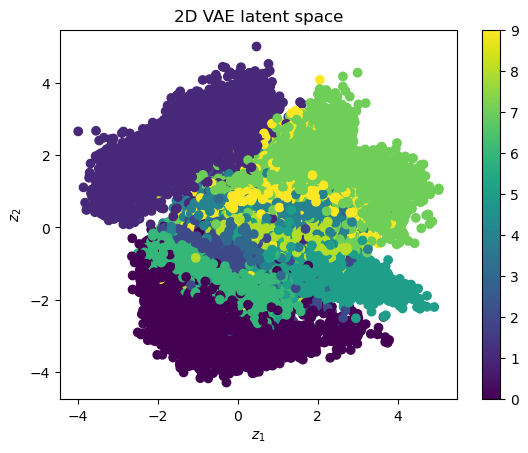

In [105]:
plt.scatter(x=encoded_data[:,0], y=encoded_data[:,1], c=labels)
plt.colorbar()
plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.title("2D VAE latent space")
plt.show()

#### 2) Evaluate p(z) as a grid.

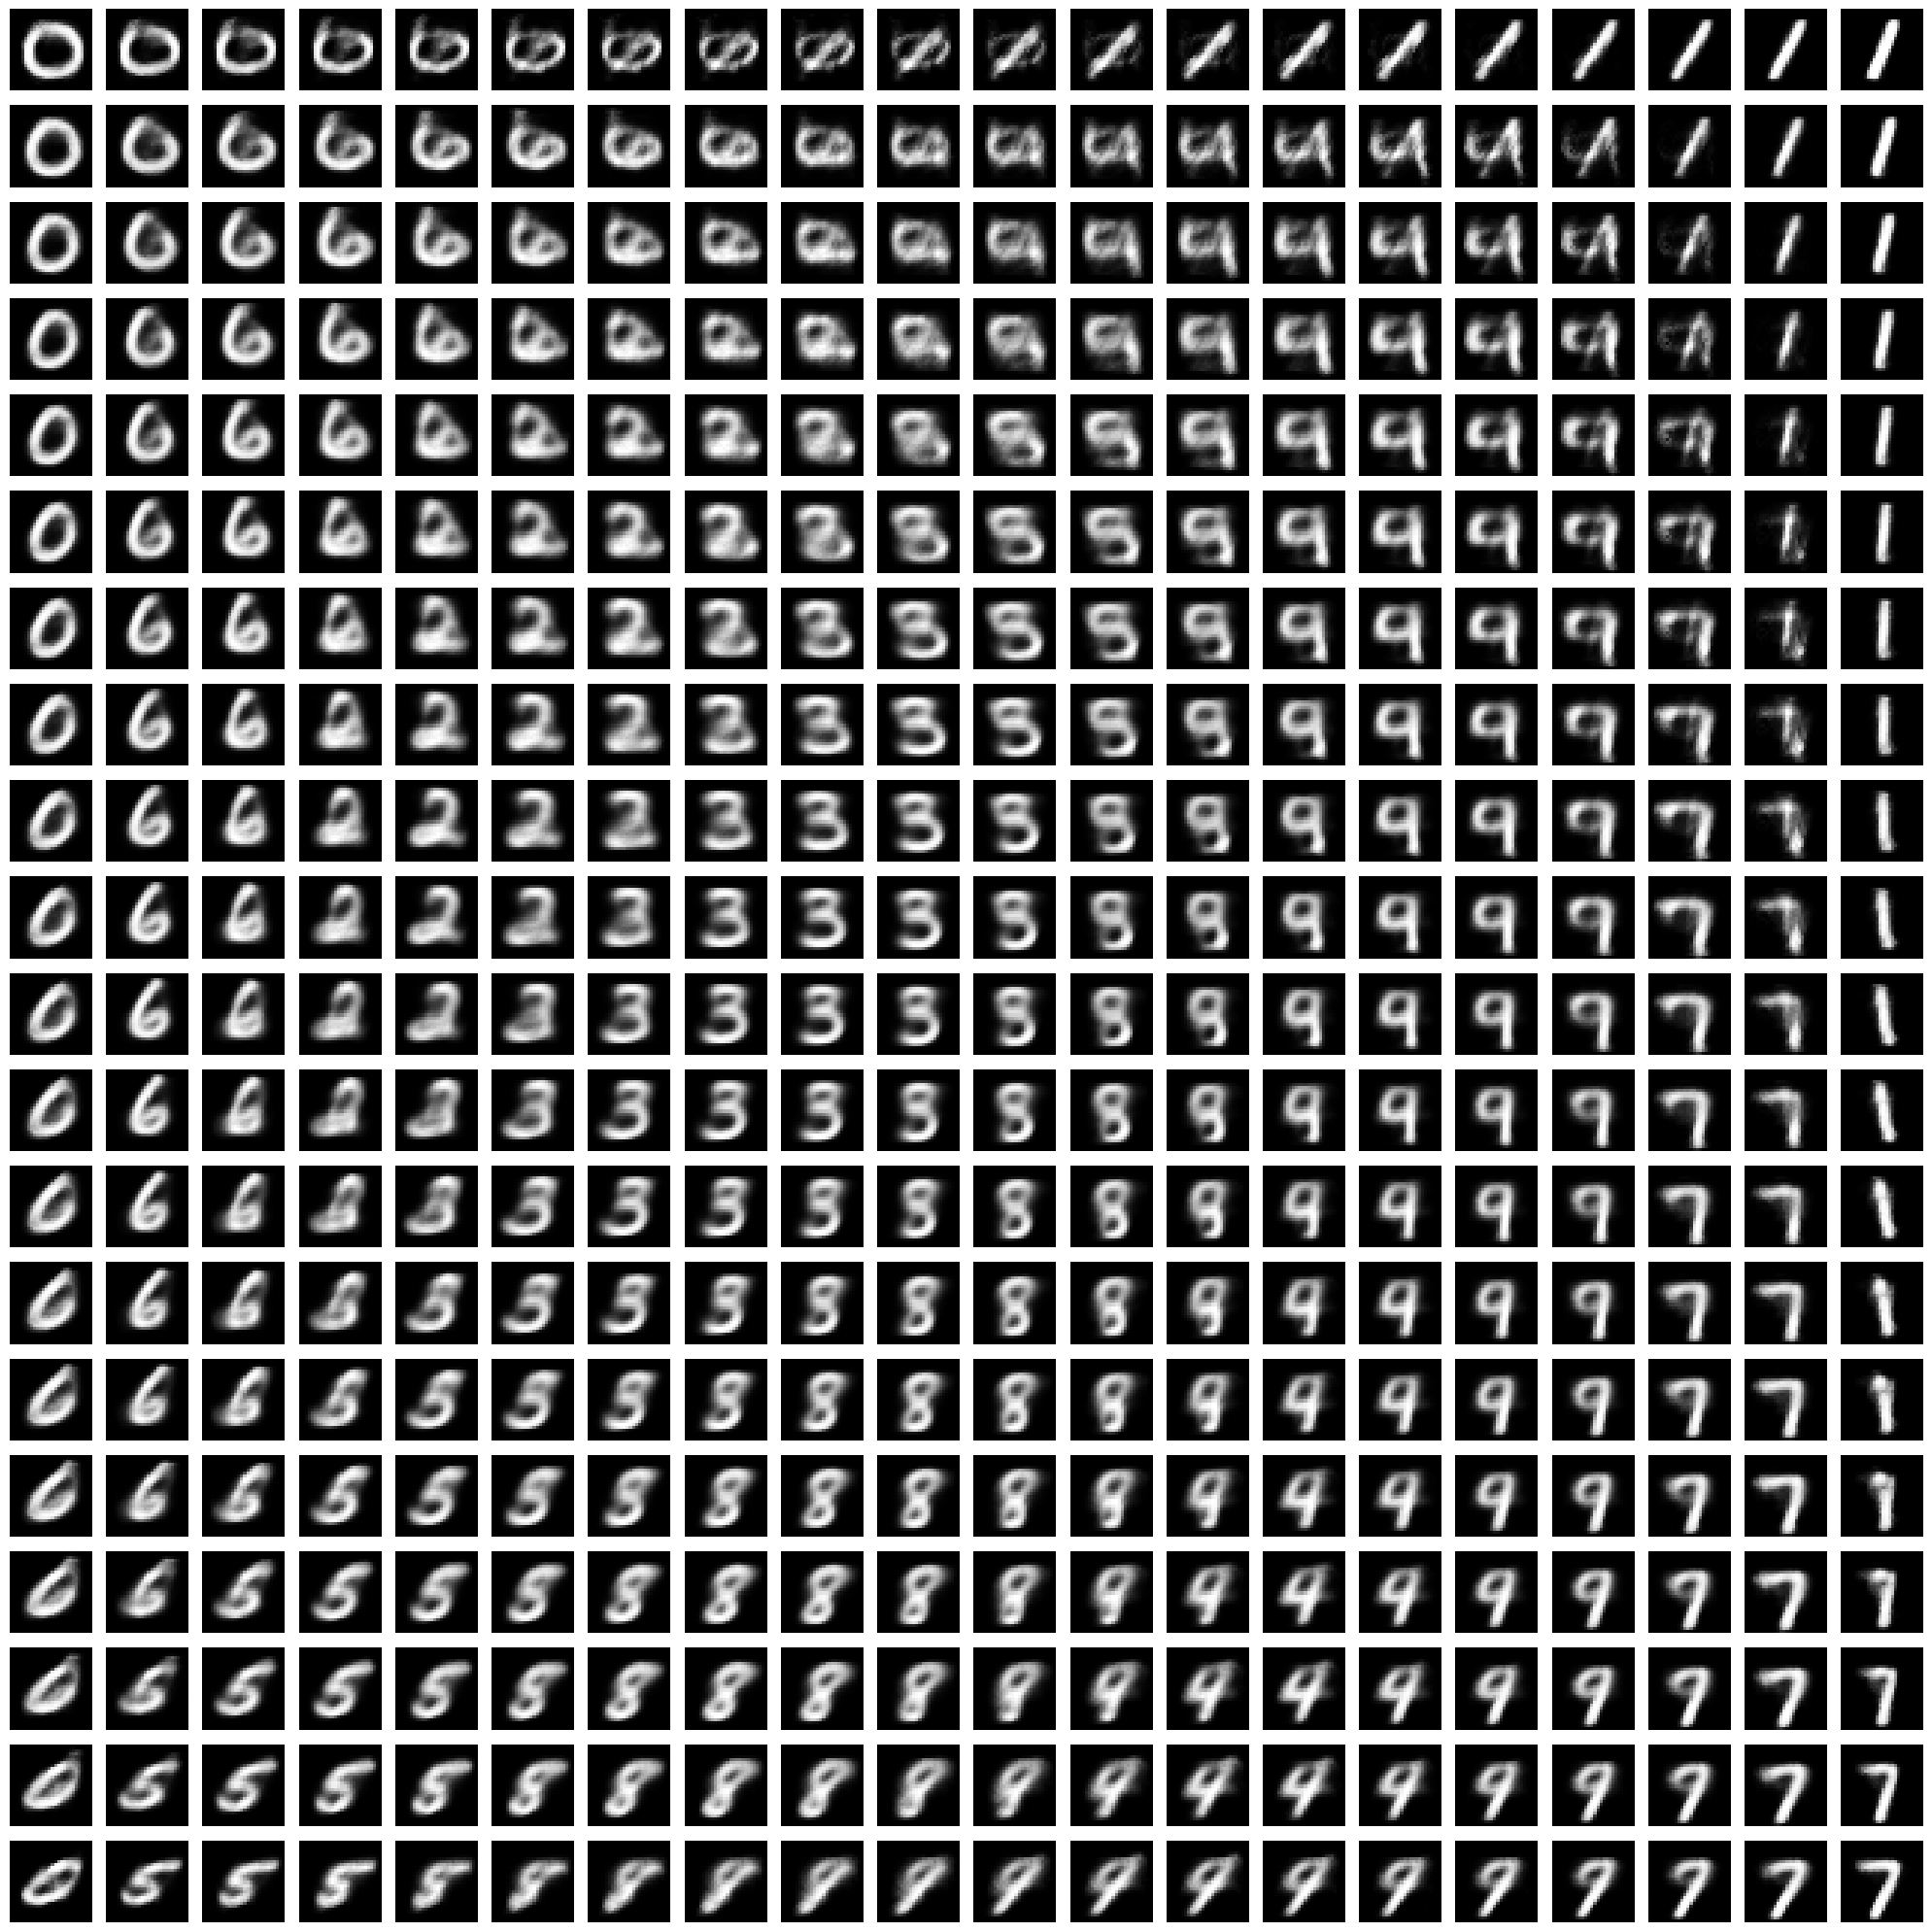

In [115]:
k = 20
xx = torch.linspace(0.01, 0.99, k)

xx, yy = torch.meshgrid(xx, xx, indexing="ij")

uni_sample = torch.stack([xx.flatten(), yy.flatten()], dim=-1)

samples = torch.distributions.normal.Normal(0, 1).icdf(uni_sample).to(device)
samples = samples.view(k, k, 2)

fix, axs = plt.subplots(k, k, figsize=(20,20))

for i in range(k):
    for j in range(k):
        img = vae.decoder(samples[i,j].unsqueeze(0)).view(28,28).cpu().detach().numpy()
    
        axs[i,j].imshow(img, cmap="gray")
        axs[i,j].axis("off")
plt.tight_layout()
plt.show()

### Extension ideas:
1. increase the number of layers for the encoder or decoder
2. use convolutional instead of linear layers
3. weigh the loss function, see beta-VAE losses